# <span style="color:darkblue">ABO Systematic Review - SNPs, R2, Pop</span> 

Author: Kiana Lee Martinez\
Date: 2023

# <span style="color:dodgerblue">Import Packages</span>

In [3]:
# importing necessary packages
import pandas as pd
import numpy as np
import glob # finds all the pathnames matching a specified pattern according to the rules used by the Unix shell
import os # Miscellaneous operating system interfaces
import seaborn as sns # for data visualization 
from scipy import stats # for performing stats
import scipy.stats.distributions as dist # for performing stats
import matplotlib.pyplot as plt # for data vis
import matplotlib.patches as mpatches # for data vis
import svgutils.transform as sg
import sys 
import statistics
from tabulate import tabulate

In [4]:
# set useful variables
directory = "../"

# <span style="color:dodgerblue">Read in datasets</span>

Read in merged raw data.

In [5]:
# read in csv file
df_raw = pd.read_csv(directory + "data/complete-raw-data.csv")
df_raw.shape

(136, 48)

Read in data that contains the 1000g population description for each reference. 

In [6]:
# read in csv file
df_pop_catgeory = pd.read_csv(directory + "data/population-descriptions.csv")
#subset columns of interest
df_pop_catgeory.head()

,refid,author,title,accession_num,database_provider,date,id,issue,journal,language,...,volume,year,pop_descrip,afr,amr,eas,eur,sas,other,1000g_population
0,22,"Song, Jaewoo; Chen, Fengju; Campos, Marco; Bol...",Quantitative influence of ABO blood groups on ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,2015,"European, African American",2856,0,0,8817,0,0,"AFR, EUR"
1,44,"Ellinghaus, David; Degenhardt, Frauke; Bujanda...",The ABO blood group locus and a chromosome 3 g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020,"Italian, Spanish",0,0,0,3815,0,0,EUR
2,49,"Zakai, Neil A; Judd, Suzanne E; Alexander, Kri...",ABO blood type and stroke risk: The RE asons f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,2014,"black, white",552,0,0,552,0,0,"AFR, EUR"
3,53,"KlÃ¸veâ€Mogensen, Kirstine; Steffensen, Rudi;...","ABO, secretor, and Lewis carbohydrate histoâ€...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2022,Caucasians,0,0,0,unclear,0,0,unclear
4,325,"Raffield, Laura M; Lu, Ake T; Szeto, Mindy D; ...",Coagulation factor VIII: Relationship to cardi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,2020,African American,3493,0,0,0,0,0,AFR


Subset to only have refid and 1000g_population.

In [7]:
# subset
df_pop_category2 = df_pop_catgeory[["refid", "1000g_population"]]
df_pop_category2

,refid,1000g_population
0,22,"AFR, EUR"
1,44,EUR
2,49,"AFR, EUR"
3,53,unclear
4,325,AFR
...,...,...
131,1912,EAS
132,1926,EAS
133,1963,EUR
134,1967,EAS


Combine these two dataframes. 

In [8]:
# merge the raw data and additional data
df = pd.merge(df_raw, df_pop_category2, on = "refid")
# take a look dataframe dimensionality 
df.shape

(136, 49)

In [9]:
df

,refid,author,title,accession_num,database_provider,date,id,issue,journal,language,...,study,seq,multi_b_snps,o2,subtypes,o_v_nono,diversity,imputed,notes,1000g_population
0,22,"Song, Jaewoo; Chen, Fengju; Campos, Marco; Bol...",Quantitative influence of ABO blood groups on ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,cohort study,Affymetrix 6.0 array,No,No,No,No,Yes,NaN,Unclear how they used the two other SNPs to cl...,"AFR, EUR"
1,44,"Ellinghaus, David; Degenhardt, Frauke; Bujanda...",The ABO blood group locus and a chromosome 3 g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,association study,Illumina’s Global Screening Array (GSA) versio...,No,Yes (rs41302905),No,No,No,NaN,NaN,EUR
2,49,"Zakai, Neil A; Judd, Suzanne E; Alexander, Kri...",ABO blood type and stroke risk: The RE asons f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,case-cohort study; association study,probes from TaqMan,No,No,No,No,Yes,No,NaN,"AFR, EUR"
3,53,"Kløve‐Mogensen, Kirstine; Steffensen, Rudi; Ma...","ABO, secretor, and Lewis carbohydrate histo‐bl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,case-control study; association study,TaqMan SNP Genotyping Assays,Unclear,No,No,No,No,NaN,Unclear how the SNPs were used to determine AB...,unclear
4,325,"Raffield, Laura M; Lu, Ake T; Szeto, Mindy D; ...",Coagulation factor VIII: Relationship to cardi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,prospective community-based study; association...,whole genome sequencing,No,No,No,Yes,No,Unclear,NaN,AFR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1912,"Yamamura, K.,Ihara, K.,Ikeda, K.,Nagata, H.,Mi...",Histo-blood group gene polymorphisms as potent...,22117627,Nlm,Apr,1186.0,2,Int J Immunogenet,eng,...,association study; case-control study,TaqMan SNP assay,"Yes (rs8176747, rs8176746)",No,No,Yes,No,No,NaN,EAS
132,1926,"Ye, B. D.,Kim, B. M.,Jung, S.,Lee, H. S.,Hong,...",Association of FUT2 and ABO with Crohn's disea...,31260595,Nlm,Jan,1200.0,1,J Gastroenterol Hepatol,eng,...,association study,TaqMan SNP genotyping assay,No,No,No,Yes,No,No,NaN,EAS
133,1963,"Zhang, M.,Lykke-Andersen, S.,Zhu, B.,Xiao, W.,...",Characterising cis-regulatory variation in the...,28634199,Nlm,Mar,1237.0,3,Gut,eng,...,eQTL study,"Illumina OmniExpress, Omni1M arrays, Affymetr...",No,No,No,Yes,No,unclear,Genomic data imputed,EUR
134,1967,"Zhao, S. X.,Xue, L. Q.,Liu, W.,Gu, Z. H.,Pan, ...",Robust evidence for five new Graves' disease r...,23612905,Ovid Technologies,15-Aug,1241.0,16,Human Molecular Genetics,English,...,case-control study;,"Illumina Human660-Quad BeadChips, TaqMan SNP g...",No,No,No,No,No,unclear,Genomic data imputed,EAS


# <span style="color:dodgerblue">Population Break Down</span>

In [10]:
# counts within 1000g population breakdown
df["1000g_population"].value_counts()

EUR                     59
EAS                     30
unclear                 19
AFR                      7
AFR, EUR                 6
EUR, other               4
AMR                      3
AFR, EUR, other          2
AFR, AMR, EUR, other     2
AFR, other               2
SAS                      1
AFR, EAS, EUR, other     1
Name: 1000g_population, dtype: int64

## Count the number of times a population is evaluated

In [11]:
# for loop to count the number of times EUR is seen
eur_sum = 0
for i in df["1000g_population"]:
    if 'EUR' in i :
        eur_sum += 1

# for loop to count the number of times AFR is seen
afr_sum = 0
for i in df["1000g_population"]:
    if "AFR" in i :
        afr_sum += 1

# for loop to count the number of times AMR is seen
amr_sum = 0
for i in df["1000g_population"]:
    if 'AMR' in i :
        amr_sum += 1

# for loop to count the number of times EAS is seen
eas_sum = 0
for i in df["1000g_population"]:
    if 'EAS' in i :
        eas_sum += 1

# for loop to count the number of times SAS is seen
sas_sum = 0
for i in df["1000g_population"]:
    if 'SAS' in i :
        sas_sum += 1
print(eur_sum, afr_sum, amr_sum, eas_sum, sas_sum)

74 20 5 31 1


Make into a dataframe with count and proportion. 

In [12]:
# make a dataframe

# initialize a data of lists
populations = {'Population': ["EUR", "AFR", "AMR", "EAS", "SAS"],
              'Number_of_References': [eur_sum, afr_sum, amr_sum, eas_sum, sas_sum]}

# create dataframe
pop = pd.DataFrame(populations)

# add in proportions
pop['Proportion'] = (pop['Number_of_References'] / pop['Number_of_References'].sum())

pop

,Population,Number_of_References,Proportion
0,EUR,74,0.564885
1,AFR,20,0.152672
2,AMR,5,0.038168
3,EAS,31,0.236641
4,SAS,1,0.007634


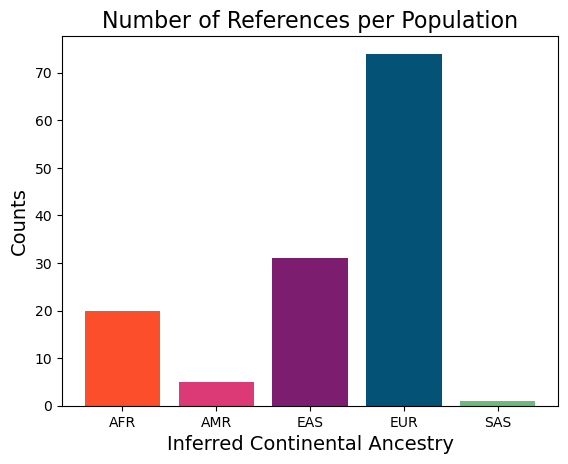

In [13]:
# create a bargraph

# save ficgure before show()
fig = plt.gcf()

# create new color palette
color_palette = ['#FC4E2A','#DC3977','#7C1D6F', '#045275', '#6CBA7D']

df_sorted=pop.sort_values('Population')

plt.bar(df_sorted['Population'], df_sorted['Number_of_References'], color=color_palette)
plt.title('Number of References per Population', fontsize=16)
plt.xlabel('Inferred Continental Ancestry', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

# save figure
fig.savefig(f"{directory}results/python_figures/number-references-per-population.svg", 
           format='svg')

# <span style="color:dodgerblue">R2 for Each Reference Considering Their Population of Interest</span>

We want to evaluate the r2 value for O vs non-O SNPs and A vs B SNPs used by each reference while also considering their population of interest. 

For example, for a study done in an East Asian population we will extract the tag SNP they used and calculate the r2 value using an East Asian reference. For those that use a functional SNP, the r2 value would be 1. 

To do this we will need to do a couple of things:

1. read in the r2 values caluclated using NIH LD pop
2. subset out and evaluate each popualtion separately
3. for studies that use more than one SNP, give them the "benefit of the doubt" and select the best performing SNP for their population; this means if an option is the functional SNP then we use the functional SNP
4. create a dataframe that assigns each population in each study with an r2

Note that for studies that use more than one population, they will have more than one r2 value. 

## Subset dataframe

Make a subset that includes the SNPs used, counts of individuals per population, and population categorization. 

In [14]:
df_pop = df[['refid', 'o_snps', 'b_snps', 'cohort_total', 'afr', 'amr', 'eas', 'eur', 'sas', 'other', '1000g_population']]
# rename columns
df_pop.columns = ['refid', 'o_snp', 'a_b_snp', 'total_cohort_n', 'afr_n', 'amr_n', 'eas_n', 'eur_n', 'sas_n', 'other_n', '1000g_pop']
df_pop

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop
0,22,rs8176719,rs8176746,11673,2856,0,0,8817,0,0,"AFR, EUR"
1,44,rs8176719,rs8176747,3815,0,0,0,3815,0,0,EUR
2,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR"
3,53,rs8176719,unclear,unclear,0,0,0,unclear,0,0,unclear
4,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR
...,...,...,...,...,...,...,...,...,...,...,...
131,1912,rs8176719,"rs8176746, rs8176747",737,0,0,737,0,0,0,EAS
132,1926,"rs8176719, rs687289",rs8176746,9809,0,0,9809,0,0,0,EAS
133,1963,"rs8176719, rs687289",NaN,219,0,0,0,219,0,0,EUR
134,1967,rs505922,rs8176746,18680,0,0,18680,0,0,0,EAS


## Read in r2 values

R2 values calculated by using [NIH LDpop](https://ldlink.nci.nih.gov/?tab=ldpop). These values retrieved by Andrew Klein.

### For O vs non-O SNPs

The functional SNP for O vs non-O is rs8176719.

In [15]:
# read in and concat .csv files from folder
path = f'{directory}data/r2_values/o_data/to-merge' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))
all_files

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

r2_o = pd.concat(li, axis=0, ignore_index=True)
r2_o.head(3)

,Functional SNP,Tag SNP,Population,R2,D'
0,rs8176719,rs505922,ALL,0.7625,0.8930
1,rs8176719,rs505922,AFR,0.4375,0.7772
2,rs8176719,rs505922,YRI,0.4255,0.7970


### For A vs B SNPs

Andrew calculated r2 using the following SNPs as the functional SNPs:

* rs8176746
* rs8176747
* rs8176743
* rs7853989

But for our purposes we are only using the r2 calculated with rs8176746 as the functional SNP.

In [16]:
# read in and concat .csv files from folder
path = f'{directory}data/r2_values/b_data/to-merge' # use your path
all_files = glob.glob(os.path.join(path , "rs8176746*.csv"))
all_files

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

r2_ab = pd.concat(li, axis=0, ignore_index=True)
r2_ab.head(3)

,Functional SNP,Tag SNP,Population,R2,D'
0,rs8176746,rs8176672,ALL,0.8372,0.9894
1,rs8176746,rs8176672,AFR,0.5418,0.9738
2,rs8176746,rs8176672,YRI,0.4398,1.0000


In [17]:
r2_ab['Tag SNP'].unique()

array(['rs8176672', 'rs8176720', 'rs8176722', 'rs8176741', 'rs8176746',
       'rs8176747', 'rs8176749'], dtype=object)

## Subset out AFR

In [18]:
# remove unclears and zeros with respect to afr_n
df_afr = df_pop.loc[(df_pop["afr_n"] != "0") & (df_pop["afr_n"] != "unclear")]
df_afr.shape

(19, 11)

We want to use only one SNP so will default to either the functional SNP or the most appropriate SNP and remove the other. 

In [19]:
# replace values for o_snp
df_afr['o_snp'] = df_afr['o_snp'].replace(['rs8176719, rs505922', 'rs529565, rs8176693'], ['rs8176719', 'rs529565'])

# replace values for a_b_snp
df_afr['a_b_snp'] = df_afr['a_b_snp'].replace(['rs8176746, rs8176743'], ['rs8176746'])

# add in a colun
df_afr['pop'] = "AFR"
df_afr

# add in number
df_afr['pop_n'] = df_afr['afr_n'].astype(int)

df_afr.head()

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\1040238294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_afr['o_snp'] = df_afr['o_snp'].replace(['rs8176719, rs505922', 'rs529565, rs8176693'], ['rs8176719', 'rs529565'])
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\1040238294.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_afr['a_b_snp'] = df_afr['a_b_snp'].replace(['rs8176746, rs8176743'], ['rs8176746'])
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\1040238294.py:8: Set

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n
0,22,rs8176719,rs8176746,11673,2856,0,0,8817,0,0,"AFR, EUR",AFR,2856
2,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552
4,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR,AFR,3493
5,730,rs8176719,NaN,101,101,0,0,0,0,0,AFR,AFR,101
33,1785,rs8176719,rs8176747,651,651,0,0,0,0,0,AFR,AFR,651


### Add in r2 for AFR

What I want to do is the following:

1. in my dataframe make a new column and set it to nan 
2. make a list of snps I want to refer to by just taking note of the unique values in the snp column
3. in my loop i first want to check that the snp from the list also exists in the dataframe that has r2 values calculated from the functional and tag SNP, i.e. setting an if statement to deal with the "unclears" and potential "nan" in the snp colum. These were the read in above and labeleld `r2_o` and `ab_o`
4. if the condition is met, then populate the new column with the r2 value if the two other conditions are met
5. if the condition is not met (i.e. for "unclears" and nans), set the new column value to nan

Do this separately for O SNPs and AB SNPs.

### for O SNPs

In [20]:
# make new column and set as nan 
df_afr['o_r2'] = np.nan

# make a list of unique SNPs 
o_snp_list = df_afr['o_snp'].unique()

# for loop replacing value with r2 
for i in o_snp_list:
    if i in r2_o['Tag SNP'].unique(): # check if the snp exists in the r2 dataframe
        df_afr.loc[df_afr['o_snp'] == i, 'o_r2'] = [r2_o.loc[(r2_o['Tag SNP'] == i) & (r2_o['Population'] == "AFR"), 'R2']]
    else:
        df_afr.loc[df_afr['o_snp'] == i, 'o_r2'] = np.nan # if snp doesn't exist set to nan

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\2030819433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_afr['o_r2'] = np.nan


### for A/B SNPs

In [21]:
# make new column and set as nan 
df_afr['ab_r2'] = np.nan

# make a list of unique SNPs 
ab_snp_list = df_afr['a_b_snp'].unique()
ab_snp_list

# for loop replacing value with r2 
for i in ab_snp_list:
    if i in r2_ab['Tag SNP'].unique(): # check if the snp exists in the r2 dataframe
        df_afr.loc[df_afr['a_b_snp'] == i, 'ab_r2'] = [r2_ab.loc[(r2_ab['Tag SNP'] == i) & (r2_ab['Population'] == "AFR"), 'R2']]
    else:
        df_afr.loc[df_afr['a_b_snp'] == i, 'ab_r2'] = np.nan # if snp doesn't exist set to nan

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\42851521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_afr['ab_r2'] = np.nan


## Subset out AMR

In [22]:
# remove unclears and zeros with respect to amr_n
df_amr = df_pop.loc[(df_pop["amr_n"] != "0") & (df_pop["amr_n"] != "unclear")]

We want to use only one SNP so will default to either the functional SNP or the most appropriate SNP and remove the other. 

In [23]:
# replace values for a_b_snp
df_amr['a_b_snp'] = df_amr['a_b_snp'].replace(['rs8176746, rs8176747', 'rs8176746, rs8176743', 'rs8176746, rs8176749'], 'rs8176746')

# add in a colun
df_amr['pop'] = "AMR"
df_amr


# add in number
df_amr['pop_n'] = df_amr['amr_n'].astype(int)

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\639107291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amr['a_b_snp'] = df_amr['a_b_snp'].replace(['rs8176746, rs8176747', 'rs8176746, rs8176743', 'rs8176746, rs8176749'], 'rs8176746')
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\639107291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amr['pop'] = "AMR"
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\639107291.py:10: SettingWithCopyWarning: 
A value is trying to be set o

Add in another column describing single population. This will mean some references will be counted more than once. 

### Add in r2 for AMR

What I want to do is the following:

1. in my datamrame make a new column and set it to nan 
2. make a list of snps I want to refer to by just taking note of the unique values in the snp column
3. in my loop i first want to check that the snp from the list also exists in the datamrame that has r2 values calculated from the functional and tag SNP, i.e. setting an if statement to deal with the "unclears" and potential "nan" in the snp colum. These were the read in above and labeleld `r2_o` and `ab_o`
4. if the condition is met, then population the new column with the r2 value if the two other conditions are met
5. if the condition is not met (i.e. for "unclears" and nans), set the new column value to nan

Do this separately for O SNPs and AB SNPs.

### for O SNPs

In [24]:
# make new column and set as nan 
df_amr['o_r2'] = np.nan

# make a list of unique SNPs 
o_snp_list = df_amr['o_snp'].unique()
o_snp_list

# for loop replacing value with r2 
for i in o_snp_list:
    if i in r2_o['Tag SNP'].unique(): # check if the snp exists in the r2 datamrame
        df_amr.loc[df_amr['o_snp'] == i, 'o_r2'] = [r2_o.loc[(r2_o['Tag SNP'] == i) & (r2_o['Population'] == "AMR"), 'R2']]
    else:
        df_amr.loc[df_amr['o_snp'] == i, 'o_r2'] = np.nan # if snp doesn't exist set to nan

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\3910829571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amr['o_r2'] = np.nan


### for A/B SNPs

In [25]:
# make new column and set as nan 
df_amr['ab_r2'] = np.nan

# make a list of unique SNPs 
ab_snp_list = df_amr['a_b_snp'].unique()
ab_snp_list

# for loop replacing value with r2 
for i in ab_snp_list:
    if i in r2_ab['Tag SNP'].unique(): # check if the snp exists in the r2 datamrame
        df_amr.loc[df_amr['a_b_snp'] == i, 'ab_r2'] = [r2_ab.loc[(r2_ab['Tag SNP'] == i) & (r2_ab['Population'] == "AMR"), 'R2']]
    else:
        df_amr.loc[df_amr['a_b_snp'] == i, 'ab_r2'] = np.nan # if snp doesn't exist set to nan

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\3860647685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amr['ab_r2'] = np.nan


## Subset out EAS

In [26]:
# remove unclears and zeros with respect to eas_n
df_eas = df_pop.loc[(df_pop["eas_n"] != "0") & (df_pop["eas_n"] != "unclear")]

We want to use only one SNP so will default to either the functional SNP or the most appropriate SNP and remove the other. 

In [27]:
# replace values for o_snp
df_eas['o_snp'] = df_eas['o_snp'].replace(['rs8176719, rs687289'], ['rs8176719'])

# replace values for a_b_snp
df_eas['a_b_snp'] = df_eas['a_b_snp'].replace(['rs8176746, rs8176747', 'rs8176747, rs7853989', 'rs8176743, rs8176746, rs8176749'], 
                                              ['rs8176746', 'rs8176747', 'rs8176746'])

# add in a colun
df_eas['pop'] = "EAS"
df_eas

# add in number
df_eas['pop_n'] = df_eas['eas_n'].astype(int)

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\716193045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eas['o_snp'] = df_eas['o_snp'].replace(['rs8176719, rs687289'], ['rs8176719'])
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\716193045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eas['a_b_snp'] = df_eas['a_b_snp'].replace(['rs8176746, rs8176747', 'rs8176747, rs7853989', 'rs8176743, rs8176746, rs8176749'],
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\716193045.py:

Add in another column describing single population. This will mean some references will be counted more than once. 

### Add in r2 for EAS

What I want to do is the following:

1. in my dateasame make a new column and set it to nan 
2. make a list of snps I want to refer to by just taking note of the unique values in the snp column
3. in my loop i first want to check that the snp from the list also exists in the dateasame that has r2 values calculated from the functional and tag SNP, i.e. setting an if statement to deal with the "unclears" and potential "nan" in the snp colum. These were the read in above and labeleld `r2_o` and `ab_o`
4. if the condition is met, then population the new column with the r2 value if the two other conditions are met
5. if the condition is not met (i.e. for "unclears" and nans), set the new column value to nan

Do this separately for O SNPs and AB SNPs.

### for O SNPs

In [28]:
# make new column and set as nan 
df_eas['o_r2'] = np.nan

# make a list of unique SNPs 
o_snp_list = df_eas['o_snp'].unique()
o_snp_list

# for loop replacing value with r2 
for i in o_snp_list:
    if i in r2_o['Tag SNP'].unique(): # check if the snp exists in the r2 dateasame
        df_eas.loc[df_eas['o_snp'] == i, 'o_r2'] = [r2_o.loc[(r2_o['Tag SNP'] == i) & (r2_o['Population'] == "EAS"), 'R2']]
    else:
        df_eas.loc[df_eas['o_snp'] == i, 'o_r2'] = np.nan # if snp doesn't exist set to nan

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\871891349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eas['o_r2'] = np.nan


### for A/B SNPs

In [29]:
# make new column and set as nan 
df_eas['ab_r2'] = np.nan

# make a list of unique SNPs 
ab_snp_list = df_eas['a_b_snp'].unique()
ab_snp_list

# for loop replacing value with r2 
for i in ab_snp_list:
    if i in r2_ab['Tag SNP'].unique(): # check if the snp exists in the r2 dateasame
        df_eas.loc[df_eas['a_b_snp'] == i, 'ab_r2'] = [r2_ab.loc[(r2_ab['Tag SNP'] == i) & (r2_ab['Population'] == "EAS"), 'R2']]
    else:
        df_eas.loc[df_eas['a_b_snp'] == i, 'ab_r2'] = np.nan # if snp doesn't exist set to nan

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\1408003749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eas['ab_r2'] = np.nan


## Subset out EUR

In [30]:
# remove unclears and zeros with respect to eur_n
df_eur = df_pop.loc[(df_pop["eur_n"] != "0") & (df_pop["eur_n"] != "unclear")]

In [31]:
# print unique values
df_eur['o_snp'].unique()

array(['rs8176719', 'rs687289', 'rs505922', 'rs514659', nan, 'rs8176645',
       'unclear', 'rs657152, rs612169', 'rs8176719, rs505922',
       'rs505922, rs612169', 'rs687289, rs505922', 'rs612169', 'rs657152',
       'rs529565, rs8176693', 'rs8176719, rs687289'], dtype=object)

In [32]:
# print unique values
df_eur['a_b_snp'].unique()

array(['rs8176746', 'rs8176747', 'rs8176749', nan, 'rs7853989', 'unclear',
       'rs8176746, rs8176743', 'rs8176743', 'rs8176746, rs8176747',
       'rs8176672', 'rs8176746, rs8176672',
       'rs8176747, rs8176720, rs8176741, rs8176746',
       'rs7853989, rs8176720'], dtype=object)

We want to use only one SNP so will default to either the functional SNP or the most appropriate SNP and remove the other. 

In [33]:
# replace values for o_snp
df_eur['o_snp'] = df_eur['o_snp'].replace(['rs657152, rs612169', 'rs8176719, rs505922', 'rs505922, rs612169', 'rs687289, rs505922',
                                           'rs529565, rs8176693', 'rs8176719, rs687289'], 
                                          ['rs657152', 'rs8176719', 'rs505922', 'rs505922', 'rs529565', 'rs8176719'])

# replace values for a_b_snp
df_eur['a_b_snp'] = df_eur['a_b_snp'].replace(['rs8176746, rs8176747', 'rs8176746, rs8176672', 
                                               'rs8176747, rs8176720, rs8176741, rs8176746', 'rs7853989, rs8176720'], 
                                              ['rs8176746', 'rs8176746', 'rs8176746', 'rs8176720'])

# add in a colun
df_eur['pop'] = "EUR"


# add in number
df_eur['pop_n'] = df_eur['eur_n'].astype(int)

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\3764192381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eur['o_snp'] = df_eur['o_snp'].replace(['rs657152, rs612169', 'rs8176719, rs505922', 'rs505922, rs612169', 'rs687289, rs505922',
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\3764192381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eur['a_b_snp'] = df_eur['a_b_snp'].replace(['rs8176746, rs8176747', 'rs8176746, rs8176672',
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_39

Add in another column describing single population. This will mean some references will be counted more than once. 

### Add in r2 for EUR

What I want to do is the following:

1. in my dateurame make a new column and set it to nan 
2. make a list of snps I want to refer to by just taking note of the unique values in the snp column
3. in my loop i first want to check that the snp from the list also exists in the dateurame that has r2 values calculated from the functional and tag SNP, i.e. setting an if statement to deal with the "unclears" and potential "nan" in the snp colum. These were the read in above and labeleld `r2_o` and `ab_o`
4. if the condition is met, then population the new column with the r2 value if the two other conditions are met
5. if the condition is not met (i.e. for "unclears" and nans), set the new column value to nan

Do this separately for O SNPs and AB SNPs.

### for O SNPs

In [34]:
# make new column and set as nan 
df_eur['o_r2'] = np.nan

# make a list of unique SNPs 
o_snp_list = df_eur['o_snp'].unique()
o_snp_list

# for loop replacing value with r2 
for i in o_snp_list:
    if i in r2_o['Tag SNP'].unique(): # check if the snp exists in the r2 dateurame
        df_eur.loc[df_eur['o_snp'] == i, 'o_r2'] = [r2_o.loc[(r2_o['Tag SNP'] == i) & (r2_o['Population'] == "EUR"), 'R2']]
    else:
        df_eur.loc[df_eur['o_snp'] == i, 'o_r2'] = np.nan # if snp doesn't exist set to nan

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\907897214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eur['o_r2'] = np.nan


### for A/B SNPs

In [35]:
# make new column and set as nan 
df_eur['ab_r2'] = np.nan

# make a list of unique SNPs 
ab_snp_list = df_eur['a_b_snp'].unique()
ab_snp_list

# for loop replacing value with r2 
for i in ab_snp_list:
    if i in r2_ab['Tag SNP'].unique(): # check if the snp exists in the r2 dateurame
        df_eur.loc[df_eur['a_b_snp'] == i, 'ab_r2'] = [r2_ab.loc[(r2_ab['Tag SNP'] == i) & (r2_ab['Population'] == "EUR"), 'R2']]
    else:
        df_eur.loc[df_eur['a_b_snp'] == i, 'ab_r2'] = np.nan # if snp doesn't exist set to nan

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\3776387331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eur['ab_r2'] = np.nan


## Subset out SAS

In [36]:
# remove unclears and zeros with respect to sas_n
df_sas = df_pop.loc[(df_pop["sas_n"] != "0") & (df_pop["sas_n"] != "unclear")]
df_sas

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop
22,1191,rs8176719,rs8176747,646,0,0,0,0,646,0,SAS


We want to use only one SNP so will default to either the functional SNP or the most appropriate SNP and remove the other. 

In [37]:
# add in a colun
df_sas['pop'] = "SAS"
df_sas

# add in number
df_sas['pop_n'] = df_sas['sas_n'].astype(int)

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\1158452225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sas['pop'] = "SAS"
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\1158452225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sas['pop_n'] = df_sas['sas_n'].astype(int)


Add in another column describing single population. This will mean some references will be counted more than once. 

### Add in r2 for SAS

What I want to do is the following:

1. in my datsasame make a new column and set it to nan 
2. make a list of snps I want to refer to by just taking note of the unique values in the snp column
3. in my loop i first want to check that the snp from the list also exists in the datsasame that has r2 values calculated from the functional and tag SNP, i.e. setting an if statement to deal with the "unclears" and potential "nan" in the snp colum. These were the read in above and labeleld `r2_o` and `ab_o`
4. if the condition is met, then population the new column with the r2 value if the two other conditions are met
5. if the condition is not met (i.e. for "unclears" and nans), set the new column value to nan

Do this separately for O SNPs and AB SNPs.

### for O SNPs

In [38]:
# make new column and set as nan 
df_sas['o_r2'] = np.nan

# make a list of unique SNPs 
o_snp_list = df_sas['o_snp'].unique()
o_snp_list

# for loop replacing value with r2 
for i in o_snp_list:
    if i in r2_o['Tag SNP'].unique(): # check if the snp exists in the r2 datsasame
        df_sas.loc[df_sas['o_snp'] == i, 'o_r2'] = [r2_o.loc[(r2_o['Tag SNP'] == i) & (r2_o['Population'] == "SAS"), 'R2']]
    else:
        df_sas.loc[df_sas['o_snp'] == i, 'o_r2'] = np.nan # if snp doesn't exist set to nan

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\152888676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sas['o_r2'] = np.nan


### for A/B SNPs

In [39]:
# make new column and set as nan 
df_sas['ab_r2'] = np.nan

# make a list of unique SNPs 
ab_snp_list = df_sas['a_b_snp'].unique()
ab_snp_list

# for loop replacing value with r2 
for i in ab_snp_list:
    if i in r2_ab['Tag SNP'].unique(): # check if the snp exists in the r2 datsasame
        df_sas.loc[df_sas['a_b_snp'] == i, 'ab_r2'] = [r2_ab.loc[(r2_ab['Tag SNP'] == i) & (r2_ab['Population'] == "SAS"), 'R2']]
    else:
        df_sas.loc[df_sas['a_b_snp'] == i, 'ab_r2'] = np.nan # if snp doesn't exist set to nan

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\3766549059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sas['ab_r2'] = np.nan


## Concat dataframes

In [40]:
li = [df_afr, df_amr, df_eas, df_eur]
r2_concat = pd.concat(li, axis=0, ignore_index=True)
r2_concat.head()

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2
0,22,rs8176719,rs8176746,11673,2856,0,0,8817,0,0,"AFR, EUR",AFR,2856,1.0000,1.0
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0
2,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR,AFR,3493,1.0000,NaN
3,730,rs8176719,NaN,101,101,0,0,0,0,0,AFR,AFR,101,1.0000,NaN
4,1785,rs8176719,rs8176747,651,651,0,0,0,0,0,AFR,AFR,651,1.0000,1.0


In [41]:
# save and export
r2_concat.to_csv(directory + "data/r2_values/r2_pop.csv")

# <span style="color:dodgerblue">R2 per Study Considering their Population</span>

## O SNP - N is Number of References

### Everything including functional SNPs

In [42]:
# frequency of unique values
r2_concat['pop'].value_counts()

EUR    72
EAS    31
AFR    19
AMR     5
Name: pop, dtype: int64

In [43]:
# remove nans in o_r2
r2_concat_rmnans_o = r2_concat.dropna(subset=['o_r2'])
r2_concat_rmnans_o_table  = r2_concat_rmnans_o['pop'].value_counts()
r2_concat_rmnans_o_table

# create dataframe
r2_concat_rmnans_o_table = pd.DataFrame(r2_concat_rmnans_o_table)
r2_concat_rmnans_o_table

,pop
EUR,65
EAS,28
AFR,17
AMR,5


In [44]:
# write to csv 
r2_concat_rmnans_o_table.to_csv(f"{directory}results/r2_per_study_considering_pop/r2_all_snps_o.csv")

#### Summary stats

Getting the min and max; the range of r2.

In [45]:
# min r2
r2_concat_rmnans_o_min = min(r2_concat_rmnans_o.o_r2)
# max r2
r2_concat_rmnans_o_max = max(r2_concat_rmnans_o.o_r2)

# print results
print("The min is ", r2_concat_rmnans_o_min, "\n",
     "The max is ", r2_concat_rmnans_o_max)

The min is  0.3872 
 The max is  1.0


**Getting the r2 range, median, mean, and standard deviation of r2 for specific populations.** 

In [46]:
### AFR

# subset to only include AFR pops
r2_concat_rmnans_o_afr = r2_concat_rmnans_o.loc[r2_concat_rmnans_o['pop'] == "AFR"]

# mean
r2_concat_rmnans_o_afr_mean = statistics.mean(r2_concat_rmnans_o_afr.o_r2)
# standard deviation
r2_concat_rmnans_o_afr_stdev = statistics.stdev(r2_concat_rmnans_o_afr.o_r2)

# median
r2_concat_rmnans_o_afr_median = statistics.median(r2_concat_rmnans_o_afr.o_r2)

# range
r2_concat_rmnans_o_afr_min = min(r2_concat_rmnans_o_afr.o_r2)
r2_concat_rmnans_o_afr_max = max(r2_concat_rmnans_o_afr.o_r2)

In [47]:
### AMR

# subset to only include AMR pops
r2_concat_rmnans_o_amr = r2_concat_rmnans_o.loc[r2_concat_rmnans_o['pop'] == "AMR"]

# mean
r2_concat_rmnans_o_amr_mean = statistics.mean(r2_concat_rmnans_o_amr.o_r2)
# standard deviation
r2_concat_rmnans_o_amr_stdev = statistics.stdev(r2_concat_rmnans_o_amr.o_r2)

# median
r2_concat_rmnans_o_amr_median = statistics.median(r2_concat_rmnans_o_amr.o_r2)

# range
r2_concat_rmnans_o_amr_min = min(r2_concat_rmnans_o_amr.o_r2)
r2_concat_rmnans_o_amr_max = max(r2_concat_rmnans_o_amr.o_r2)

In [48]:
### EAS

# subset to only include AMR pops
r2_concat_rmnans_o_eas = r2_concat_rmnans_o.loc[r2_concat_rmnans_o['pop'] == "EAS"]

# mean
r2_concat_rmnans_o_eas_mean = statistics.mean(r2_concat_rmnans_o_eas.o_r2)
# standard deviation
r2_concat_rmnans_o_eas_stdev = statistics.stdev(r2_concat_rmnans_o_eas.o_r2)

# median
r2_concat_rmnans_o_eas_median = statistics.median(r2_concat_rmnans_o_eas.o_r2)

# range
r2_concat_rmnans_o_eas_min = min(r2_concat_rmnans_o_eas.o_r2)
r2_concat_rmnans_o_eas_max = max(r2_concat_rmnans_o_eas.o_r2)

In [49]:
### EUR

# subset to only include AMR pops
r2_concat_rmnans_o_eur = r2_concat_rmnans_o.loc[r2_concat_rmnans_o['pop'] == "EUR"]

# mean
r2_concat_rmnans_o_eur_mean = statistics.mean(r2_concat_rmnans_o_eur.o_r2)
# standard deviation
r2_concat_rmnans_o_eur_stdev = statistics.stdev(r2_concat_rmnans_o_eur.o_r2)

# median
r2_concat_rmnans_o_eur_median = statistics.median(r2_concat_rmnans_o_eur.o_r2)

# range
r2_concat_rmnans_o_eur_min = min(r2_concat_rmnans_o_eur.o_r2)
r2_concat_rmnans_o_eur_max = max(r2_concat_rmnans_o_eur.o_r2)

In [50]:
### SAS

# subset to only include AMR pops
r2_concat_rmnans_o_sas = r2_concat_rmnans_o.loc[r2_concat_rmnans_o['pop'] == "SAS"]

r2_concat_rmnans_o_sas # this dataset is empty 

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2


In [51]:
# make a table of results

r2_concat_rmnans_o_results = [["AFR", r2_concat_rmnans_o_afr_min, r2_concat_rmnans_o_afr_max, r2_concat_rmnans_o_afr_median, r2_concat_rmnans_o_afr_mean, r2_concat_rmnans_o_afr_stdev],
                                ["AMR", r2_concat_rmnans_o_amr_min, r2_concat_rmnans_o_amr_max, r2_concat_rmnans_o_amr_median, r2_concat_rmnans_o_amr_mean, "NA"],
                                ["EAS", r2_concat_rmnans_o_eas_min, r2_concat_rmnans_o_eas_max, r2_concat_rmnans_o_eas_median, r2_concat_rmnans_o_eas_mean, r2_concat_rmnans_o_eas_stdev],
                                ["EUR", r2_concat_rmnans_o_eur_min, r2_concat_rmnans_o_eur_max, r2_concat_rmnans_o_eur_median, r2_concat_rmnans_o_eur_mean, r2_concat_rmnans_o_eur_stdev]]
r2_concat_rmnans_o_results = pd.DataFrame(r2_concat_rmnans_o_results, columns=["pop", "min","max", "median", "mean", "stdev"])
r2_concat_rmnans_o_results

,pop,min,max,median,mean,stdev
0,AFR,0.3872,1.0,1.0000,0.865876,0.24955
1,AMR,0.8204,1.0,1.0000,0.964080,NA
2,EAS,0.9460,1.0,1.0000,0.983821,0.023537
3,EUR,0.8528,1.0,0.8687,0.929543,0.067001


In [52]:
# write to csv 
r2_concat_rmnans_o_results.to_csv(f"{directory}results/r2_per_study_considering_pop/r2_concat_allsnp_o_results.csv")

#### Boxplot

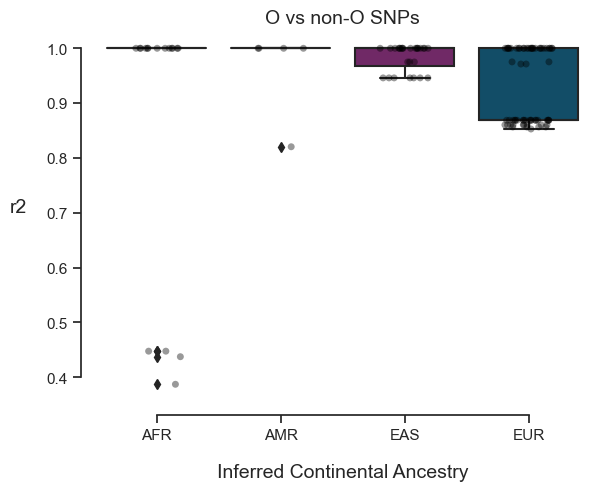

In [53]:
## boxplot

# assign
fig1 = plt.gcf()

# create new color palette
color_palette = ['#FC4E2A','#DC3977','#7C1D6F', '#045275', '#6CBA7D']

# set theme
sns.set_theme(style="ticks", palette=color_palette)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="pop", y="o_r2",
            data=r2_concat_rmnans_o)
sns.stripplot(x="pop", y="o_r2", data=r2_concat_rmnans_o, color = "black", alpha = 0.4, jitter=0.2)
sns.despine(offset=10, trim=True)

# titles/labesl
plt.title('O vs non-O SNPs', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('r2', fontsize=14, rotation=0, labelpad=20)
plt.show()

# save figure
fig1.savefig(f"{directory}results/python_figures/r2-o-snp-per-study-per-population.svg", 
           format='svg',
           bbox_inches="tight")

### Multiple Pairwise comparisons

It performs multiple pairwise comparisons of treatment groups using **Tukey's HSD (Honestly Significant Difference)** test to check if group means are significantly different from each other. It uses the **Tukey-Kramer** approach if the sample sizes are unequal among the groups. I used the Tukey-Kramer test. 

[Dunn's test](https://www.statisticshowto.com/dunns-test/). Once an initial ANOVA or Kruskal-Wallis Test is performed, Dunn's Test can be used to pinpoint which specific means are significant from the others. Dunn’s Multiple Comparison Test is a post hoc (i.e. it’s run after an ANOVA) non parametric test (a “distribution free” test that doesn’t assume your data comes from a particular distribution).

In [54]:
# lookat at dataset
r2_concat.head()

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2
0,22,rs8176719,rs8176746,11673,2856,0,0,8817,0,0,"AFR, EUR",AFR,2856,1.0000,1.0
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0
2,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR,AFR,3493,1.0000,NaN
3,730,rs8176719,NaN,101,101,0,0,0,0,0,AFR,AFR,101,1.0000,NaN
4,1785,rs8176719,rs8176747,651,651,0,0,0,0,0,AFR,AFR,651,1.0000,1.0


In [55]:
# write to csv 
r2_concat.to_csv(f"{directory}data/r2-pop-data-for-r/osnp_including_r2_pop_results.csv")

#### Tukey-Kramer Test

Performed with R. 

#### Kruskal- Wallis & Dunn's Test

Performed with R. 

### Exclude functional SNPs - i.e. Tag SNPs only

In [56]:
r2_concat.head()

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2
0,22,rs8176719,rs8176746,11673,2856,0,0,8817,0,0,"AFR, EUR",AFR,2856,1.0000,1.0
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0
2,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR,AFR,3493,1.0000,NaN
3,730,rs8176719,NaN,101,101,0,0,0,0,0,AFR,AFR,101,1.0000,NaN
4,1785,rs8176719,rs8176747,651,651,0,0,0,0,0,AFR,AFR,651,1.0000,1.0


In [57]:
r2_concat.shape

(127, 15)

In [58]:
r2_concat_ex_o = r2_concat.loc[r2_concat['o_snp'] != 'rs8176719']
r2_concat_ex_o.shape

(64, 15)

In [59]:
# write to csv 
r2_concat_ex_o.to_csv(f"{directory}data/r2-pop-data-for-r/osnp_excluding_r2_pop_results.csv")

In [60]:
# frequency of unique values
r2_concat_ex_o['pop'].value_counts()

EUR    44
EAS    13
AFR     6
AMR     1
Name: pop, dtype: int64

In [61]:
# remove nans in o_r2
r2_concat_ex_o_rmnans = r2_concat_ex_o.dropna(subset=['o_r2'])
r2_concat_ex_o_rmnans_table = r2_concat_ex_o_rmnans['pop'].value_counts()
r2_concat_ex_o_rmnans_table 

# create dataframe
r2_concat_ex_o_rmnans_table = pd.DataFrame(r2_concat_ex_o_rmnans_table)
r2_concat_ex_o_rmnans_table

,pop
EUR,37
EAS,10
AFR,4
AMR,1


In [62]:
# write to csv 
r2_concat_ex_o_rmnans_table.to_csv(f"{directory}results/r2_per_study_considering_pop/r2_tag_snps_o.csv")

In [63]:
r2_concat_ex_o_rmnans.head()

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0
5,1950,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0
8,25,rs505922,rs8176746,1127,83,0,0,983,0,61,"AFR, EUR, other",AFR,83,0.4375,1.0
17,1763,rs529565,rs8176749,23603,5047,0,0,18556,0,0,"AFR, EUR",AFR,5047,0.3872,1.0
19,1614,rs505922,rs8176746,2077,0,2077,0,0,0,0,AMR,AMR,2077,0.8204,1.0


#### Summary stats

Getting the min and max; the range of r2.

In [64]:
# min r2
r2_concat_ex_o_rmnans_min = min(r2_concat_ex_o_rmnans.o_r2)
# max r2
r2_concat_ex_o_rmnans_max = max(r2_concat_ex_o_rmnans.o_r2)

# print results
print("The min is ", r2_concat_ex_o_rmnans_min, "\n",
     "The max is ", r2_concat_ex_o_rmnans_max)

The min is  0.3872 
 The max is  0.9752


**Getting the r2 range, median, mean, and standard deviation of r2 for specific populations.** 

In [65]:
### AFR

# subset to only include AFR pops
r2_concat_ex_o_rmnans_afr = r2_concat_ex_o_rmnans.loc[r2_concat_ex_o_rmnans['pop'] == "AFR"]

# mean
r2_concat_ex_o_rmnans_afr_mean = statistics.mean(r2_concat_ex_o_rmnans_afr.o_r2)
# standard deviation
r2_concat_ex_o_rmnans_afr_stdev = statistics.stdev(r2_concat_ex_o_rmnans_afr.o_r2)

# median
r2_concat_ex_o_rmnans_afr_median = statistics.median(r2_concat_ex_o_rmnans_afr.o_r2)

# range
r2_concat_ex_o_rmnans_afr_min = min(r2_concat_ex_o_rmnans_afr.o_r2)
r2_concat_ex_o_rmnans_afr_max = max(r2_concat_ex_o_rmnans_afr.o_r2)

In [66]:
### AMR

# subset to only include AMR pops
r2_concat_ex_o_rmnans_amr = r2_concat_ex_o_rmnans.loc[r2_concat_ex_o_rmnans['pop'] == "AMR"]

# mean
r2_concat_ex_o_rmnans_amr_mean = statistics.mean(r2_concat_ex_o_rmnans_amr.o_r2)
# standard deviation
#r2_concat_ex_o_rmnans_amr_stdev = statistics.stdev(r2_concat_ex_o_rmnans_amr.o_r2) # only one data point so cannot compute stdev

# median
r2_concat_ex_o_rmnans_amr_median = statistics.median(r2_concat_ex_o_rmnans_amr.o_r2)

# range
r2_concat_ex_o_rmnans_amr_min = min(r2_concat_ex_o_rmnans_amr.o_r2)
r2_concat_ex_o_rmnans_amr_max = max(r2_concat_ex_o_rmnans_amr.o_r2)

In [67]:
### EAS

# subset to only include AFR pops
r2_concat_ex_o_rmnans_eas = r2_concat_ex_o_rmnans.loc[r2_concat_ex_o_rmnans['pop'] == "EAS"]

# mean
r2_concat_ex_o_rmnans_eas_mean = statistics.mean(r2_concat_ex_o_rmnans_eas.o_r2)
# standard deviation
r2_concat_ex_o_rmnans_eas_stdev = statistics.stdev(r2_concat_ex_o_rmnans_eas.o_r2)

# median
r2_concat_ex_o_rmnans_eas_median = statistics.median(r2_concat_ex_o_rmnans_eas.o_r2)

# range
r2_concat_ex_o_rmnans_eas_min = min(r2_concat_ex_o_rmnans_eas.o_r2)
r2_concat_ex_o_rmnans_eas_max = max(r2_concat_ex_o_rmnans_eas.o_r2)

In [68]:
### EUR

# subset to only include EUR pops
r2_concat_ex_o_rmnans_eur = r2_concat_ex_o_rmnans.loc[r2_concat_ex_o_rmnans['pop'] == "EUR"]

# mean
r2_concat_ex_o_rmnans_eur_mean = statistics.mean(r2_concat_ex_o_rmnans_eur.o_r2)
# standard deviation
r2_concat_ex_o_rmnans_eur_stdev = statistics.stdev(r2_concat_ex_o_rmnans_eur.o_r2)

# median
r2_concat_ex_o_rmnans_eur_median = statistics.median(r2_concat_ex_o_rmnans_eur.o_r2)

# range
r2_concat_ex_o_rmnans_eur_min = min(r2_concat_ex_o_rmnans_eur.o_r2)
r2_concat_ex_o_rmnans_eur_max = max(r2_concat_ex_o_rmnans_eur.o_r2)


In [69]:
### SAS

# subset to only include SAS pops
r2_concat_ex_o_rmnans_sas = r2_concat_ex_o_rmnans.loc[r2_concat_ex_o_rmnans['pop'] == "SAS"]

r2_concat_ex_o_rmnans_sas # this dataset is empty 

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2


In [70]:
# make a table of results

r2_concat_ex_o_results = [["AFR", r2_concat_ex_o_rmnans_afr_min, r2_concat_ex_o_rmnans_afr_max, r2_concat_ex_o_rmnans_afr_median, r2_concat_ex_o_rmnans_afr_mean, r2_concat_ex_o_rmnans_afr_stdev],
                                ["AMR", r2_concat_ex_o_rmnans_amr_min, r2_concat_ex_o_rmnans_amr_max, r2_concat_ex_o_rmnans_amr_median, r2_concat_ex_o_rmnans_amr_mean, "NA"],
                                ["EAS", r2_concat_ex_o_rmnans_eas_min, r2_concat_ex_o_rmnans_eas_max, r2_concat_ex_o_rmnans_eas_median, r2_concat_ex_o_rmnans_eas_mean, r2_concat_ex_o_rmnans_eas_stdev],
                                ["EUR", r2_concat_ex_o_rmnans_eur_min, r2_concat_ex_o_rmnans_eur_max, r2_concat_ex_o_rmnans_eur_median, r2_concat_ex_o_rmnans_eur_mean, r2_concat_ex_o_rmnans_eur_stdev]]
r2_concat_ex_o_results = pd.DataFrame(r2_concat_ex_o_results, columns=["pop", "min","max", "median", "mean", "stdev"])
r2_concat_ex_o_results

,pop,min,max,median,mean,stdev
0,AFR,0.3872,0.4476,0.44255,0.429975,0.028911
1,AMR,0.8204,0.8204,0.82040,0.820400,NA
2,EAS,0.9460,0.9750,0.94600,0.954700,0.014008
3,EUR,0.8528,0.9752,0.86870,0.876224,0.034608


In [71]:
# write to csv 
r2_concat_ex_o_results.to_csv(f"{directory}results/r2_per_study_considering_pop/r2_concat_tsnp_o_results.csv")

#### Boxplot

https://stackoverflow.com/questions/36578458/how-does-one-insert-statistical-annotations-stars-or-p-values

https://github.com/trevismd/statannotations/blob/master/usage/example.ipynb


In [72]:
#pip install statannotations

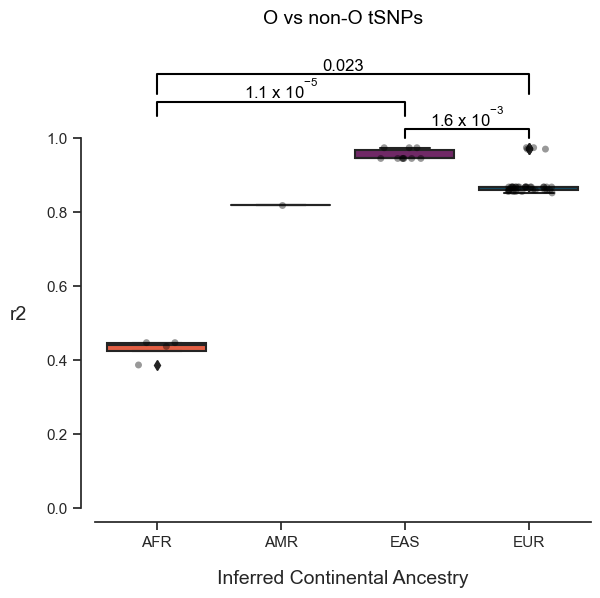

In [73]:
## boxplot

# assign
fig2 = plt.gcf()

# create new color palette
color_palette = ['#FC4E2A','#DC3977','#7C1D6F', '#045275', '#6CBA7D']

# set theme
sns.set_theme(style="ticks", palette=color_palette)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="pop", y="o_r2",
            data=r2_concat_ex_o_rmnans)
sns.stripplot(x="pop", y="o_r2", data=r2_concat_ex_o_rmnans, color = "black", alpha = 0.4, jitter=0.2)
sns.despine(offset=10, trim=False)

#plt.title('O vs non-O tSNPs', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('r2', fontsize=14, rotation=0, labelpad=20)
plt.ylim(0,1)

#statistical annotation - EAS - EUR
x1, x2 = 2, 3 # columns 'EAS' and 'EUR'
y, h, col = 1, 1.025, 'k'
plt.plot([x1, x1, x2, x2], [y, h, h, y], lw=1.5, c=col, clip_on=False)
#plt.text((x1+x2)*.5, h, "1.1e-05", ha='center', va='bottom', color=col)
plt.text((x1+x2)*.5, h, "1.6 x $\mathregular{10^{-3}}$", ha='center', va='bottom', color=col)

#statistical annotation - AFR = EAS
x1, x2 = 0, 2 # columns 'AFR' and 'EAS'
y, h, col = 1.06, 1.1, 'k'
plt.plot([x1, x1, x2, x2], [y, h, h, y], lw=1.5, c=col, clip_on=False)
#plt.text((x1+x2)*.5, h, "1.6e-03", ha='center', va='bottom', color=col)
plt.text((x1+x2)*.5, h, "1.1 x $\mathregular{10^{-5}}$", ha='center', va='bottom', color=col)

#statistical annotation - AFR - EUR
x1, x2 = 0, 3 # columns 'AFR' and 'EUR'
y, h, col = 1.12, 1.175, 'k'
plt.plot([x1, x1, x2, x2], [y, h, h, y], lw=1.5, c=col, clip_on=False) # to get marker to show beyong axes, turn the clipping off 
plt.text((x1+x2)*.5, h, "0.023", ha='center', va='bottom', color=col)

# plot title
x1, x2 = 0, 3
plt.text((x1+x2)*.5, 1.3, "O vs non-O tSNPs", ha='center', va='bottom', color=col, fontsize=14)

plt.show()

# save figure
fig2.savefig(f"{directory}results/python_figures/r2-o-snp-per-study-per-population-tsnp.svg", 
           format='svg',
           bbox_inches="tight")

#### Tukey-Kramer Test

#### Kruskal-Wallis & Dunn's Test

### Number of Studies with Functional SNPs vs Tag SNPs

In [74]:
# AFR
o_afr_fsnps = len(r2_concat_rmnans_o.loc[(r2_concat_rmnans_o['pop'] == "AFR") & (r2_concat_rmnans_o['o_snp'] == "rs8176719")])
o_afr_tsnps = len(r2_concat_rmnans_o.loc[(r2_concat_rmnans_o['pop'] == "AFR") & (r2_concat_rmnans_o['o_snp'] != "rs8176719")])

# AMR
o_amr_fsnps = len(r2_concat_rmnans_o.loc[(r2_concat_rmnans_o['pop'] == "AMR") & (r2_concat_rmnans_o['o_snp'] == "rs8176719")])
o_amr_tsnps = len(r2_concat_rmnans_o.loc[(r2_concat_rmnans_o['pop'] == "AMR") & (r2_concat_rmnans_o['o_snp'] != "rs8176719")])

# EAS
o_eas_fsnps = len(r2_concat_rmnans_o.loc[(r2_concat_rmnans_o['pop'] == "EAS") & (r2_concat_rmnans_o['o_snp'] == "rs8176719")])
o_eas_tsnps = len(r2_concat_rmnans_o.loc[(r2_concat_rmnans_o['pop'] == "EAS") & (r2_concat_rmnans_o['o_snp'] != "rs8176719")])

# EUR
o_eur_fsnps = len(r2_concat_rmnans_o.loc[(r2_concat_rmnans_o['pop'] == "EUR") & (r2_concat_rmnans_o['o_snp'] == "rs8176719")])
o_eur_tsnps = len(r2_concat_rmnans_o.loc[(r2_concat_rmnans_o['pop'] == "EUR") & (r2_concat_rmnans_o['o_snp'] != "rs8176719")])

# SAS
o_sas_fsnps = len(r2_concat_rmnans_o.loc[(r2_concat_rmnans_o['pop'] == "SAS") & (r2_concat_rmnans_o['o_snp'] == "rs8176719")])
o_sas_tsnps = len(r2_concat_rmnans_o.loc[(r2_concat_rmnans_o['pop'] == "SAS") & (r2_concat_rmnans_o['o_snp'] != "rs8176719")])

# make a data table of results
o_fsnp_tsnp_data = [["AFR", o_afr_fsnps, o_afr_tsnps],
                    ["AMR", o_amr_fsnps, o_amr_tsnps],
                    ["EAS", o_eas_fsnps, o_eas_tsnps],
                    ["EUR", o_eur_fsnps, o_eur_tsnps],
                    ["SAS", o_sas_fsnps, o_sas_tsnps]]

# make a table of results
o_fsnp_tsnp_data_results = pd.DataFrame(o_fsnp_tsnp_data, columns=["Population", "o_fsnp_studies","o_tsnp_studies"])
o_fsnp_tsnp_data_results


,Population,o_fsnp_studies,o_tsnp_studies
0,AFR,13,4
1,AMR,4,1
2,EAS,18,10
3,EUR,28,37
4,SAS,0,0


In [75]:
# write to csv 
o_fsnp_tsnp_data_results.to_csv(f"{directory}results/r2_per_study_considering_pop/o_fsnp_tsnp_data_results.csv")

### Proportion of O allele tag SNPs with r2<0.9

In [76]:
### AFR

### o_r2 < 0.9

# pull all rows that have o_r2 < 0.9 and count the # of rows
afr_9 = len(r2_concat_ex_o_rmnans_afr.loc[r2_concat_ex_o_rmnans_afr['o_r2'] < 0.9])

# count all rows 
afr_denom = len(r2_concat_ex_o_rmnans_afr)

# proportion <0.9
afr_nine_prop = afr_9/afr_denom * 100

### o_r2 < 0.5

# pull all rows that have o_r2 < 0.9 and count the # of rows
afr_5 = len(r2_concat_ex_o_rmnans_afr.loc[r2_concat_ex_o_rmnans_afr['o_r2'] < 0.5])

# count all rows 
afr_denom = len(r2_concat_ex_o_rmnans_afr)

# proportion <0.9
afr_five_prop= afr_5/afr_denom * 100

# print results
print("The proportion of o_r2 < 0.9 is", afr_nine_prop, "% and the proportion of o_r2 <0.5 is", afr_five_prop, "%.")

The proportion of o_r2 < 0.9 is 100.0 % and the proportion of o_r2 <0.5 is 100.0 %.


In [77]:
### AMR

# subset to only include AMR pops
r2_concat_ex_o_rmnans_amr = r2_concat_ex_o_rmnans.loc[r2_concat_ex_o_rmnans['pop'] == "AMR"]

### o_r2 < 0.9

# pull all rows that have o_r2 < 0.9 and count the # of rows
amr_9 = len(r2_concat_ex_o_rmnans_amr.loc[r2_concat_ex_o_rmnans_amr['o_r2'] < 0.9])

# count all rows 
amr_denom = len(r2_concat_ex_o_rmnans_amr)

# proportion <0.9
amr_nine_prop = amr_9/amr_denom * 100

### o_r2 < 0.5

# pull all rows that have o_r2 < 0.9 and count the # of rows
amr_5 = len(r2_concat_ex_o_rmnans_amr.loc[r2_concat_ex_o_rmnans_amr['o_r2'] < 0.5])

# count all rows 
amr_denom = len(r2_concat_ex_o_rmnans_amr)

# proportion <0.9
amr_five_prop= amr_5/amr_denom * 100

# print results
print("The proportion of o_r2 < 0.9 is", amr_nine_prop, "% and the proportion of o_r2 <0.5 is", amr_five_prop, "%.")

The proportion of o_r2 < 0.9 is 100.0 % and the proportion of o_r2 <0.5 is 0.0 %.


In [78]:
### EAS

### o_r2 < 0.9

# pull all rows that have o_r2 < 0.9 and count the # of rows
eas_9 = len(r2_concat_ex_o_rmnans_eas.loc[r2_concat_ex_o_rmnans_eas['o_r2'] < 0.9])

# count all rows 
eas_denom = len(r2_concat_ex_o_rmnans_eas)

# proportion <0.9
eas_nine_prop = eas_9/eas_denom * 100

### o_r2 < 0.5

# pull all rows that have o_r2 < 0.9 and count the # of rows
eas_5 = len(r2_concat_ex_o_rmnans_eas.loc[r2_concat_ex_o_rmnans_eas['o_r2'] < 0.5])

# count all rows 
eas_denom = len(r2_concat_ex_o_rmnans_eas)

# proportion <0.9
eas_five_prop= eas_5/eas_denom * 100

# print results
print("The proportion of o_r2 < 0.9 is", eas_nine_prop, "% and the proportion of o_r2 <0.5 is", eas_five_prop, "%.")

The proportion of o_r2 < 0.9 is 0.0 % and the proportion of o_r2 <0.5 is 0.0 %.


In [79]:
### EUR

### o_r2 < 0.9

# pull all rows that have o_r2 < 0.9 and count the # of rows
eur_9 = len(r2_concat_ex_o_rmnans_eur.loc[r2_concat_ex_o_rmnans_eur['o_r2'] < 0.9])

# count all rows 
eur_denom = len(r2_concat_ex_o_rmnans_eur)

# proportion <0.9
eur_nine_prop = eur_9/eur_denom * 100

### o_r2 < 0.5

# pull all rows that have o_r2 < 0.9 and count the # of rows
eur_5 = len(r2_concat_ex_o_rmnans_eur.loc[r2_concat_ex_o_rmnans_eur['o_r2'] < 0.5])

# count all rows 
eur_denom = len(r2_concat_ex_o_rmnans_eur)

# proportion <0.9
eur_five_prop= eur_5/eur_denom * 100

# print results
print("The proportion of o_r2 < 0.9 is", eur_nine_prop, "% and the proportion of o_r2 <0.5 is", eur_five_prop, "%.")

The proportion of o_r2 < 0.9 is 89.1891891891892 % and the proportion of o_r2 <0.5 is 0.0 %.


In [80]:
# make a data table of results
o_fsnp_r2_below_point_nine = [["AFR", afr_9, afr_nine_prop, afr_5, afr_five_prop],
                    ["AMR", amr_9, amr_nine_prop, amr_5, amr_five_prop],
                    ["EAS", eas_9, eas_nine_prop, eas_5, eas_five_prop],
                    ["EUR", eur_9, eur_nine_prop, eur_5, eur_five_prop]]

# make a table of results
o_fsnp_r2_below_point_nine = pd.DataFrame(o_fsnp_r2_below_point_nine, columns=["population", "count_r2<0.9","prop_r2<0.9", "count_r2<0.5","prop_r2<0.5"])
o_fsnp_r2_below_point_nine

,population,count_r2<0.9,prop_r2<0.9,count_r2<0.5,prop_r2<0.5
0,AFR,4,100.000000,4,100.0
1,AMR,1,100.000000,0,0.0
2,EAS,0,0.000000,0,0.0
3,EUR,33,89.189189,0,0.0


In [81]:
# write to csv 
o_fsnp_r2_below_point_nine.to_csv(f"{directory}results/r2_per_study_considering_pop/o_fsnp_r2_below_point_nine.csv")

## AB SNP

### Everything including functional SNPs

In [82]:
r2_concat

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2
0,22,rs8176719,rs8176746,11673,2856,0,0,8817,0,0,"AFR, EUR",AFR,2856,1.0000,1.0000
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0000
2,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR,AFR,3493,1.0000,NaN
3,730,rs8176719,NaN,101,101,0,0,0,0,0,AFR,AFR,101,1.0000,NaN
4,1785,rs8176719,rs8176747,651,651,0,0,0,0,0,AFR,AFR,651,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1706,rs8176719,NaN,11566,0,0,0,11566,0,0,EUR,EUR,11566,1.0000,NaN
123,1763,rs529565,rs8176749,23603,5047,0,0,18556,0,0,"AFR, EUR",EUR,18556,0.8608,1.0000
124,1813,rs8176719,rs8176720,4327,0,0,0,4327,0,0,EUR,EUR,4327,1.0000,0.1816
125,1888,rs505922,rs8176746,4905,0,0,0,4905,0,0,EUR,EUR,4905,0.8687,1.0000


In [83]:
# frequency of unique values
r2_concat['pop'].value_counts()

EUR    72
EAS    31
AFR    19
AMR     5
Name: pop, dtype: int64

In [84]:
# remove nans in ab_r2
r2_concat_rmnans_ab = r2_concat.dropna(subset=['ab_r2'])
r2_concat_rmnans_ab_table = r2_concat_rmnans_ab['pop'].value_counts()

# create dataframe
r2_concat_rmnans_ab_table = pd.DataFrame(r2_concat_rmnans_ab_table)
r2_concat_rmnans_ab_table

,pop
EUR,48
EAS,28
AFR,14
AMR,5


In [85]:
# write to csv 
r2_concat_rmnans_ab_table.to_csv(f"{directory}results/r2_per_study_considering_pop/r2_all_snps_ab.csv")

#### Summary stats

Getting the min and max; the range of r2.

In [86]:
# min r2
r2_concat_rmnans_ab_min = min(r2_concat_rmnans_ab.ab_r2)
# max r2
r2_concat_rmnans_ab_max = max(r2_concat_rmnans_ab.ab_r2)

# print results
print("The min is ", r2_concat_rmnans_ab_min, "\n",
     "The max is ", r2_concat_rmnans_ab_max)

The min is  0.1816 
 The max is  1.0


**Getting the r2 range, median, mean, and standard deviation of r2 for specific populations.** 

In [87]:
### AFR

# subset to only include AFR pops
r2_concat_rmnans_ab_afr = r2_concat_rmnans_ab.loc[r2_concat_rmnans_ab['pop'] == "AFR"]

# mean
r2_concat_rmnans_ab_afr_mean = statistics.mean(r2_concat_rmnans_ab_afr.ab_r2)
# standard deviation
r2_concat_rmnans_ab_afr_stdev = statistics.stdev(r2_concat_rmnans_ab_afr.ab_r2)

# median
r2_concat_rmnans_ab_afr_median = statistics.median(r2_concat_rmnans_ab_afr.ab_r2)

# range
r2_concat_rmnans_ab_afr_min = min(r2_concat_rmnans_ab_afr.ab_r2)
r2_concat_rmnans_ab_afr_max = max(r2_concat_rmnans_ab_afr.ab_r2)

In [88]:
### AMR

# subset to only include AFR pops
r2_concat_rmnans_ab_amr = r2_concat_rmnans_ab.loc[r2_concat_rmnans_ab['pop'] == "AMR"]

# mean
r2_concat_rmnans_ab_amr_mean = statistics.mean(r2_concat_rmnans_ab_amr.ab_r2)
# standard deviation
r2_concat_rmnans_ab_amr_stdev = statistics.stdev(r2_concat_rmnans_ab_amr.ab_r2)

# median
r2_concat_rmnans_ab_amr_median = statistics.median(r2_concat_rmnans_ab_amr.ab_r2)

# range
r2_concat_rmnans_ab_amr_min = min(r2_concat_rmnans_ab_amr.ab_r2)
r2_concat_rmnans_ab_amr_max = max(r2_concat_rmnans_ab_amr.ab_r2)

In [89]:
### EAS

# subset to only include AFR pops
r2_concat_rmnans_ab_eas = r2_concat_rmnans_ab.loc[r2_concat_rmnans_ab['pop'] == "EAS"]

# mean
r2_concat_rmnans_ab_eas_mean = statistics.mean(r2_concat_rmnans_ab_eas.ab_r2)
# standard deviation
r2_concat_rmnans_ab_eas_stdev = statistics.stdev(r2_concat_rmnans_ab_eas.ab_r2)

# median
r2_concat_rmnans_ab_eas_median = statistics.median(r2_concat_rmnans_ab_eas.ab_r2)

# range
r2_concat_rmnans_ab_eas_min = min(r2_concat_rmnans_ab_eas.ab_r2)
r2_concat_rmnans_ab_eas_max = max(r2_concat_rmnans_ab_eas.ab_r2)

In [90]:
### EUR

# subset to only include AFR pops
r2_concat_rmnans_ab_eur = r2_concat_rmnans_ab.loc[r2_concat_rmnans_ab['pop'] == "EUR"]

# mean
r2_concat_rmnans_ab_eur_mean = statistics.mean(r2_concat_rmnans_ab_eur.ab_r2)
# standard deviation
r2_concat_rmnans_ab_eur_stdev = statistics.stdev(r2_concat_rmnans_ab_eur.ab_r2)

# median
r2_concat_rmnans_ab_eur_median = statistics.median(r2_concat_rmnans_ab_eur.ab_r2)

# range
r2_concat_rmnans_ab_eur_min = min(r2_concat_rmnans_ab_eur.ab_r2)
r2_concat_rmnans_ab_eur_max = max(r2_concat_rmnans_ab_eur.ab_r2)

In [91]:
# make a table of results

r2_concat_ab_results = [["AFR", r2_concat_rmnans_ab_afr_min, r2_concat_rmnans_ab_afr_max, r2_concat_rmnans_ab_afr_median, r2_concat_rmnans_ab_afr_mean, r2_concat_rmnans_ab_afr_stdev],
                        ["AMR", r2_concat_rmnans_ab_amr_min, r2_concat_rmnans_ab_amr_max, r2_concat_rmnans_ab_amr_median, r2_concat_rmnans_ab_amr_mean, r2_concat_rmnans_ab_amr_stdev],
                        ["EAS", r2_concat_rmnans_ab_eas_min, r2_concat_rmnans_ab_eas_max, r2_concat_rmnans_ab_eas_median, r2_concat_rmnans_ab_eas_mean, r2_concat_rmnans_ab_eas_stdev],
                        ["EUR", r2_concat_rmnans_ab_eur_min, r2_concat_rmnans_ab_eur_max, r2_concat_rmnans_ab_eur_median, r2_concat_rmnans_ab_eur_mean, r2_concat_rmnans_ab_eur_stdev]]
r2_concat_ab_results = pd.DataFrame(r2_concat_ab_results, columns=["pop", "min","max", "median", "mean", "stdev"])
r2_concat_ab_results

,pop,min,max,median,mean,stdev
0,AFR,1.0000,1.0,1.0,1.000000,0.000000
1,AMR,1.0000,1.0,1.0,1.000000,0.000000
2,EAS,0.2566,1.0,1.0,0.973221,0.140450
3,EUR,0.1816,1.0,1.0,0.982950,0.118126


#### Boxplot

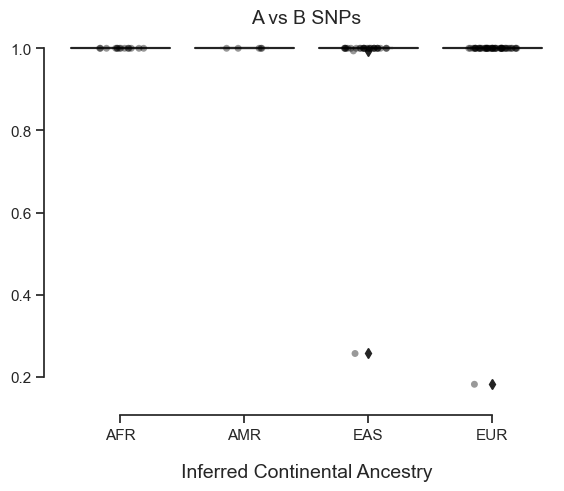

In [92]:
## boxplot

# assign
fig3 = plt.gcf()

# create new color palette
color_palette = ['#FC4E2A','#DC3977','#7C1D6F', '#045275', '#6CBA7D']
# set theme
sns.set_theme(style="ticks", palette=color_palette)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="pop", y="ab_r2",
            data=r2_concat_rmnans_ab)
sns.stripplot(x="pop", y="ab_r2", data=r2_concat_rmnans_ab, color = "black", alpha = 0.4, jitter=0.2)
sns.despine(offset=10, trim=True)

plt.title('A vs B SNPs', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('', fontsize=14, rotation=0, labelpad=20)
plt.show()

# save figure
fig3.savefig(f"{directory}results/python_figures/r2-ab-snp-per-study-per-population.svg", 
           format='svg',
           bbox_inches="tight")

#### Tukey-Kramer Test

#### Kruskal-Wallist & Dunn's Test

### Exclude functional SNPs - i.e. Tag SNPs only

In [93]:
r2_concat.head()

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2
0,22,rs8176719,rs8176746,11673,2856,0,0,8817,0,0,"AFR, EUR",AFR,2856,1.0000,1.0
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0
2,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR,AFR,3493,1.0000,NaN
3,730,rs8176719,NaN,101,101,0,0,0,0,0,AFR,AFR,101,1.0000,NaN
4,1785,rs8176719,rs8176747,651,651,0,0,0,0,0,AFR,AFR,651,1.0000,1.0


In [94]:
r2_concat.shape

(127, 15)

In [95]:
# exclude those that have funcitonal ab snp: rs7853989, rs8176743, rs8176746, rs8176747
r2_concat_ex_ab = r2_concat.loc[(r2_concat['a_b_snp'] != 'rs7853989') & 
                               (r2_concat['a_b_snp'] != 'rs8176743') &
                               (r2_concat['a_b_snp'] != 'rs8176746') &
                               (r2_concat['a_b_snp'] != 'rs8176747')]
r2_concat_ex_ab.shape

(46, 15)

In [96]:
# write to csv 
r2_concat_ex_ab.to_csv(f"{directory}data/r2-pop-data-for-r/absnp_excluding_r2_pop_results.csv")

In [97]:
# frequency of unique values
r2_concat_ex_ab['pop'].value_counts()

EUR    34
AFR     8
EAS     4
Name: pop, dtype: int64

In [98]:
# remove nans in ab_r2
r2_concat_ex_ab_rmnans = r2_concat_ex_ab.dropna(subset=['ab_r2'])
r2_concat_ex_ab_rmnans_table = r2_concat_ex_ab_rmnans['pop'].value_counts()

# create dataframe
r2_concat_ex_ab_rmnans_table = pd.DataFrame(r2_concat_ex_ab_rmnans_table)
r2_concat_ex_ab_rmnans_table

,pop
EUR,12
AFR,3
EAS,2


#### Summary stats

Getting the min and max results of r2. 

In [99]:
# min r2
r2_concat_ex_ab_rmnans_min = min(r2_concat_ex_ab_rmnans.ab_r2)
# max r2
r2_concat_ex_ab_rmnans_max = max(r2_concat_ex_ab_rmnans.ab_r2)

# print results
print("The min is ", r2_concat_ex_ab_rmnans_min, "\n",
     "The max is ", r2_concat_ex_ab_rmnans_max)

The min is  0.1816 
 The max is  1.0


**Getting the r2 range, median, mean, and standard deviation of r2 for specific populations.** 

In [100]:
### AFR

# subset to only include AFR pops
r2_concat_ex_ab_rmnans_afr = r2_concat_ex_ab_rmnans.loc[r2_concat_ex_ab_rmnans['pop'] == "AFR"]

# mean
r2_concat_ex_ab_rmnans_afr_mean = statistics.mean(r2_concat_ex_ab_rmnans_afr.ab_r2)
# standard deviation
r2_concat_ex_ab_rmnans_afr_stdev = statistics.stdev(r2_concat_ex_ab_rmnans_afr.ab_r2)

# median
r2_concat_ex_ab_rmnans_afr_median = statistics.median(r2_concat_ex_ab_rmnans_afr.ab_r2)

# range
r2_concat_ex_ab_rmnans_afr_min = min(r2_concat_ex_ab_rmnans_afr.ab_r2)
r2_concat_ex_ab_rmnans_afr_max = max(r2_concat_ex_ab_rmnans_afr.ab_r2)

In [101]:
### AMR

# No populations that used AMR used a tag SNP.

In [102]:
### EAS

# subset to only include AFR pops
r2_concat_ex_ab_rmnans_eas = r2_concat_ex_ab_rmnans.loc[r2_concat_ex_ab_rmnans['pop'] == "EAS"]

# mean
r2_concat_ex_ab_rmnans_eas_mean = statistics.mean(r2_concat_ex_ab_rmnans_eas.ab_r2)
# standard deviation
r2_concat_ex_ab_rmnans_eas_stdev = statistics.stdev(r2_concat_ex_ab_rmnans_eas.ab_r2)

# median
r2_concat_ex_ab_rmnans_eas_median = statistics.median(r2_concat_ex_ab_rmnans_eas.ab_r2)

# range
r2_concat_ex_ab_rmnans_eas_min = min(r2_concat_ex_ab_rmnans_eas.ab_r2)
r2_concat_ex_ab_rmnans_eas_max = max(r2_concat_ex_ab_rmnans_eas.ab_r2)

In [103]:
### EUR

# subset to only include AFR pops
r2_concat_ex_ab_rmnans_eur = r2_concat_ex_ab_rmnans.loc[r2_concat_ex_ab_rmnans['pop'] == "EUR"]

# mean
r2_concat_ex_ab_rmnans_eur_mean = statistics.mean(r2_concat_ex_ab_rmnans_eur.ab_r2)
# standard deviation
r2_concat_ex_ab_rmnans_eur_stdev = statistics.stdev(r2_concat_ex_ab_rmnans_eur.ab_r2)

# median
r2_concat_ex_ab_rmnans_eur_median = statistics.median(r2_concat_ex_ab_rmnans_eur.ab_r2)

# range
r2_concat_ex_ab_rmnans_eur_min = min(r2_concat_ex_ab_rmnans_eur.ab_r2)
r2_concat_ex_ab_rmnans_eur_max = max(r2_concat_ex_ab_rmnans_eur.ab_r2)

#### Boxplot

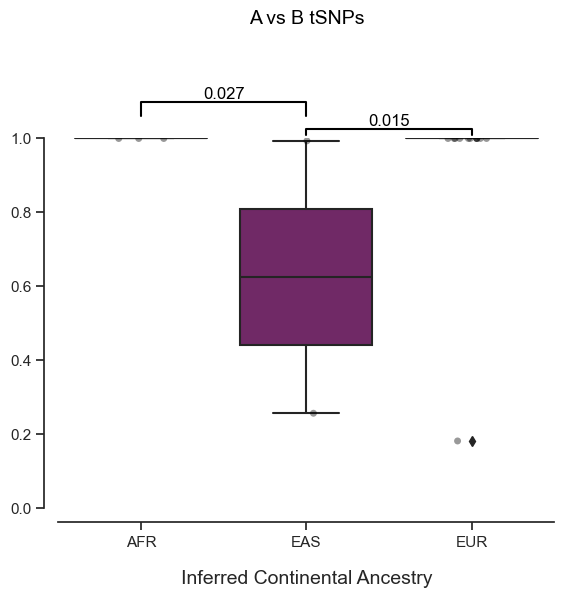

In [104]:
## boxplot

# assign
fig4 = plt.gcf()

# create new color palette
color_palette = ['#FC4E2A','#7C1D6F', '#045275']

# set theme
sns.set_theme(style="ticks", palette=color_palette)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="pop", y="ab_r2",
            data=r2_concat_ex_ab_rmnans)
sns.stripplot(x="pop", y="ab_r2", data=r2_concat_ex_ab_rmnans, color = "black", alpha = 0.4, jitter=0.2)
sns.despine(offset=10, trim=False)

#plt.title('A vs B tSNPs', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('', fontsize=14, rotation=0, labelpad=20)
plt.ylim(0,1)

#statistical annotation - EAS - EUR
x1, x2 = 1, 2 # columns 'EAS' and 'EUR'
y, h, col = 1.01, 1.026, 'k'
plt.plot([x1, x1, x2, x2], [y, h, h, y], lw=1.5, c=col, clip_on=False)
plt.text((x1+x2)*.5, h, "0.015", ha='center', va='bottom', color=col)

#statistical annotation - AFR = EAS
x1, x2 = 0, 1 # columns 'AFR' and 'EAS'
y, h, col = 1.06, 1.1, 'k'
plt.plot([x1, x1, x2, x2], [y, h, h, y], lw=1.5, c=col, clip_on=False)
plt.text((x1+x2)*.5, h, "0.027", ha='center', va='bottom', color=col)

# plot title
#plt.text(1, 1.2, "A vs B tSNPs", ha='center', va='bottom', color=col, fontsize=14)

# plot title
x1, x2 = 0, 2
plt.text((x1+x2)*.5, 1.3, "A vs B tSNPs", ha='center', va='bottom', color=col, fontsize=14)


# save figure
fig4.savefig(f"{directory}results/python_figures/r2-ab-snp-per-study-per-population-tsnp.svg", 
           format='svg',
           bbox_inches="tight")

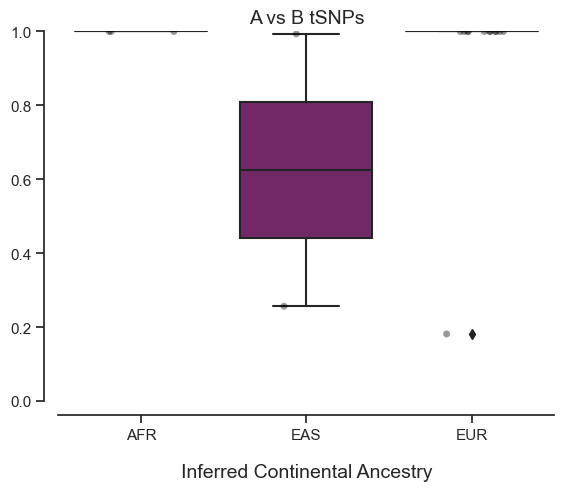

In [105]:
## boxplot

# assign
fig4 = plt.gcf()

# create new color palette
color_palette = ['#FC4E2A','#7C1D6F', '#045275']

# set theme
sns.set_theme(style="ticks", palette=color_palette)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="pop", y="ab_r2",
            data=r2_concat_ex_ab_rmnans)
sns.stripplot(x="pop", y="ab_r2", data=r2_concat_ex_ab_rmnans, color = "black", alpha = 0.4, jitter=0.2)
sns.despine(offset=10, trim=False)

plt.title('A vs B tSNPs', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('', fontsize=14, rotation=0, labelpad=20)
plt.ylim(0,1)

# save figure
fig4.savefig(f"{directory}results/python_figures/r2-ab-snp-per-study-per-population-tsnp.svg", 
           format='svg',
           bbox_inches="tight")

#### Tukey-Kramer Test

#### Krukal-Wallis & Dunn's Test

### Number of Studies with Functional SNPs vs Tag SNPs

The functional SNPs for A vs B are the following: rs7853989, rs8176743, rs8176746, rs8176747. 

In [106]:
# AFR
ab_afr_fsnps = len(r2_concat_rmnans_ab.loc[(r2_concat_rmnans_ab['pop'] == "AFR") & 
                                           ((r2_concat_rmnans_ab['a_b_snp'] == "rs7853989") | 
                                           (r2_concat_rmnans_ab['a_b_snp'] == "rs8176743") |
                                           (r2_concat_rmnans_ab['a_b_snp'] == "rs8176746") |
                                           (r2_concat_rmnans_ab['a_b_snp'] == "rs8176747"))
                                          ])
ab_afr_tsnps = len(r2_concat_rmnans_ab.loc[(r2_concat_rmnans_ab['pop'] == "AFR") & 
                                           ((r2_concat_rmnans_ab['a_b_snp'] != "rs7853989") & 
                                           (r2_concat_rmnans_ab['a_b_snp'] != "rs8176743") &
                                           (r2_concat_rmnans_ab['a_b_snp'] != "rs8176746") &
                                           (r2_concat_rmnans_ab['a_b_snp'] != "rs8176747"))
                                          ])

# AMR
ab_amr_fsnps = len(r2_concat_rmnans_ab.loc[(r2_concat_rmnans_ab['pop'] == "AMR") & 
                                           ((r2_concat_rmnans_ab['a_b_snp'] == "rs7853989") | 
                                           (r2_concat_rmnans_ab['a_b_snp'] == "rs8176743") |
                                           (r2_concat_rmnans_ab['a_b_snp'] == "rs8176746") |
                                           (r2_concat_rmnans_ab['a_b_snp'] == "rs8176747"))
                                          ])
ab_amr_tsnps = len(r2_concat_rmnans_ab.loc[(r2_concat_rmnans_ab['pop'] == "AMR") & 
                                           ((r2_concat_rmnans_ab['a_b_snp'] != "rs7853989") & 
                                           (r2_concat_rmnans_ab['a_b_snp'] != "rs8176743") &
                                           (r2_concat_rmnans_ab['a_b_snp'] != "rs8176746") &
                                           (r2_concat_rmnans_ab['a_b_snp'] != "rs8176747"))
                                          ])

# EAS
ab_eas_fsnps = len(r2_concat_rmnans_ab.loc[(r2_concat_rmnans_ab['pop'] == "EAS") & 
                                           ((r2_concat_rmnans_ab['a_b_snp'] == "rs7853989") | 
                                           (r2_concat_rmnans_ab['a_b_snp'] == "rs8176743") |
                                           (r2_concat_rmnans_ab['a_b_snp'] == "rs8176746") |
                                           (r2_concat_rmnans_ab['a_b_snp'] == "rs8176747"))
                                          ])
ab_eas_tsnps = len(r2_concat_rmnans_ab.loc[(r2_concat_rmnans_ab['pop'] == "EAS") & 
                                           ((r2_concat_rmnans_ab['a_b_snp'] != "rs7853989") & 
                                           (r2_concat_rmnans_ab['a_b_snp'] != "rs8176743") &
                                           (r2_concat_rmnans_ab['a_b_snp'] != "rs8176746") &
                                           (r2_concat_rmnans_ab['a_b_snp'] != "rs8176747"))
                                          ])
# EUR
ab_eur_fsnps = len(r2_concat_rmnans_ab.loc[(r2_concat_rmnans_ab['pop'] == "EUR")  & 
                                           ((r2_concat_rmnans_ab['a_b_snp'] == "rs7853989") | 
                                           (r2_concat_rmnans_ab['a_b_snp'] == "rs8176743") |
                                           (r2_concat_rmnans_ab['a_b_snp'] == "rs8176746") |
                                           (r2_concat_rmnans_ab['a_b_snp'] == "rs8176747"))
                                          ])
ab_eur_tsnps = len(r2_concat_rmnans_ab.loc[(r2_concat_rmnans_ab['pop'] == "EUR") & 
                                           ((r2_concat_rmnans_ab['a_b_snp'] != "rs7853989") & 
                                           (r2_concat_rmnans_ab['a_b_snp'] != "rs8176743") &
                                           (r2_concat_rmnans_ab['a_b_snp'] != "rs8176746") &
                                           (r2_concat_rmnans_ab['a_b_snp'] != "rs8176747"))
                                          ])

# make a data table of results
ab_fsnp_tsnp_data = [["AFR", ab_afr_fsnps, ab_afr_tsnps],
                    ["AMR", ab_amr_fsnps, ab_amr_tsnps],
                    ["EAS", ab_eas_fsnps, ab_eas_tsnps],
                    ["EUR", ab_eur_fsnps, ab_eur_tsnps]]

# make a table of results
ab_fsnp_tsnp_data_results = pd.DataFrame(ab_fsnp_tsnp_data, columns=["Population", "ab_fsnp_studies","ab_tsnp_studies"])
ab_fsnp_tsnp_data_results


,Population,ab_fsnp_studies,ab_tsnp_studies
0,AFR,11,3
1,AMR,5,0
2,EAS,26,2
3,EUR,36,12


In [107]:
# write to csv 
ab_fsnp_tsnp_data_results.to_csv(f"{directory}results/r2_per_study_considering_pop/ab_fsnp_tsnp_data_results.csv")

### Proportion of AB allele tag SNPs with r2<0.9

In [108]:
### AFR

### ab_r2 < 0.9

# pull all rows that have o_r2 < 0.9 and count the # of rows
afr_9_ab = len(r2_concat_ex_ab_rmnans_afr.loc[r2_concat_ex_ab_rmnans_afr['ab_r2'] < 0.9])

# count all rows 
afr_denom_ab = len(r2_concat_ex_ab_rmnans_afr)

# proportion <0.9
afr_nine_prop_ab = afr_9_ab/afr_denom_ab * 100

### ab_r2 < 0.5

# pull all rows that have o_r2 < 0.9 and count the # of rows
afr_5_ab = len(r2_concat_ex_ab_rmnans_afr.loc[r2_concat_ex_ab_rmnans_afr['ab_r2'] < 0.5])

# count all rows 
afr_denom_ab = len(r2_concat_ex_ab_rmnans_afr)

# proportion <0.9
afr_five_prop_ab = afr_5_ab/afr_denom_ab * 100

# print results
print("The proportion of ab_r2 < 0.9 is", afr_nine_prop_ab, "% and the proportion of ab_r2 <0.5 is", afr_five_prop_ab, "%.")

The proportion of ab_r2 < 0.9 is 0.0 % and the proportion of ab_r2 <0.5 is 0.0 %.


In [109]:
### AMR

### AMR doesn't use fSNPs

In [110]:
### EAS

### ab_r2 < 0.9

# pull all rows that have o_r2 < 0.9 and count the # of rows
eas_9_ab = len(r2_concat_ex_ab_rmnans_eas.loc[r2_concat_ex_ab_rmnans_eas['ab_r2'] < 0.9])

# count all rows 
eas_denom_ab = len(r2_concat_ex_ab_rmnans_eas)

# proportion <0.9
eas_nine_prop_ab = eas_9_ab/eas_denom_ab * 100

### ab_r2 < 0.5

# pull all rows that have o_r2 < 0.9 and count the # of rows
eas_5_ab = len(r2_concat_ex_ab_rmnans_eas.loc[r2_concat_ex_ab_rmnans_eas['ab_r2'] < 0.5])

# count all rows 
eas_denom_ab = len(r2_concat_ex_ab_rmnans_eas)

# proportion <0.9
eas_five_prop_ab = eas_5_ab/eas_denom_ab * 100

# print results
print("The proportion of ab_r2 < 0.9 is", eas_nine_prop_ab, "% and the proportion of ab_r2 <0.5 is", eas_five_prop_ab, "%.")

The proportion of ab_r2 < 0.9 is 50.0 % and the proportion of ab_r2 <0.5 is 50.0 %.


In [111]:
### EUR

### ab_r2 < 0.9

# pull all rows that have o_r2 < 0.9 and count the # of rows
eur_9_ab = len(r2_concat_ex_ab_rmnans_eur.loc[r2_concat_ex_ab_rmnans_eur['ab_r2'] < 0.9])

# count all rows 
eur_denom_ab = len(r2_concat_ex_ab_rmnans_eur)

# proportion <0.9
eur_nine_prop_ab = eur_9_ab/eur_denom_ab * 100

### ab_r2 < 0.5

# pull all rows that have o_r2 < 0.9 and count the # of rows
eur_5_ab = len(r2_concat_ex_ab_rmnans_eur.loc[r2_concat_ex_ab_rmnans_eur['ab_r2'] < 0.5])

# count all rows 
eur_denom_ab = len(r2_concat_ex_ab_rmnans_eur)

# proportion <0.9
eur_five_prop_ab = eur_5_ab/eur_denom_ab * 100

# print results
print("The proportion of ab_r2 < 0.9 is", eur_nine_prop_ab, "% and the proportion of ab_r2 <0.5 is", eur_five_prop_ab, "%.")

The proportion of ab_r2 < 0.9 is 8.333333333333332 % and the proportion of ab_r2 <0.5 is 8.333333333333332 %.


In [112]:
# make a data table of results
ab_fsnp_r2_below_point_nine = [["AFR", afr_9_ab, afr_nine_prop_ab, afr_5_ab, afr_five_prop_ab],
                    ["AMR", "NA", "NA", "NA", "NA"],
                    ["EAS", eas_9_ab, eas_nine_prop_ab, eas_5_ab, eas_five_prop_ab],
                    ["EUR", eur_9_ab, eur_nine_prop_ab, eur_5_ab, eur_five_prop_ab]]

# make a table of results
ab_fsnp_r2_below_point_nine = pd.DataFrame(ab_fsnp_r2_below_point_nine, columns=["population", "count_r2<0.9","prop_r2<0.9", "count_r2<0.5","prop_r2<0.5"])
ab_fsnp_r2_below_point_nine

,population,count_r2<0.9,prop_r2<0.9,count_r2<0.5,prop_r2<0.5
0,AFR,0,0.0,0,0.0
1,AMR,NA,NA,NA,NA
2,EAS,1,50.0,1,50.0
3,EUR,1,8.333333,1,8.333333


In [113]:
# write to csv 
ab_fsnp_r2_below_point_nine.to_csv(f"{directory}results/r2_per_study_considering_pop/ab_fsnp_r2_below_point_nine.csv")

# <span style="color:dodgerblue">Population n's with 0.8 r2 threshold - excluding functional SNPs</span>

In [114]:
# this is the dataset that excluded functional SNPs
r2_concat.head()

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2
0,22,rs8176719,rs8176746,11673,2856,0,0,8817,0,0,"AFR, EUR",AFR,2856,1.0000,1.0
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0
2,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR,AFR,3493,1.0000,NaN
3,730,rs8176719,NaN,101,101,0,0,0,0,0,AFR,AFR,101,1.0000,NaN
4,1785,rs8176719,rs8176747,651,651,0,0,0,0,0,AFR,AFR,651,1.0000,1.0


## For O SNPs

In [115]:
# duplicating this dataframe so that it can be used later on and not be changed by other analyses
r2_concat_ex_o_og = r2_concat_ex_o.copy() # DataFrame.copy() makes a copy of an object's indices and data
r2_concat_ex_o_og.head()

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0
5,1950,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0
6,7,unclear,unclear,1082,419,0,0,663,0,0,"AFR, EUR",AFR,419,NaN,NaN
8,25,rs505922,rs8176746,1127,83,0,0,983,0,61,"AFR, EUR, other",AFR,83,0.4375,1.0
16,1561,unclear,unclear,1147,1147,0,0,0,0,0,AFR,AFR,1147,NaN,NaN


Dichotomize data as those with >0.8 and >0.8.

In [116]:
# set column to no
r2_concat_ex_o['o_threshold'] = np.nan
# if condition met set to yes
r2_concat_ex_o.loc[r2_concat_ex_o['o_r2'] >= 0.8, "o_threshold"] = ">=0.8"
r2_concat_ex_o.loc[r2_concat_ex_o['o_r2'] < 0.8, "o_threshold"] = "<0.8"
r2_concat_ex_o

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\1416459399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2_concat_ex_o['o_threshold'] = np.nan
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\1416459399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2_concat_ex_o.loc[r2_concat_ex_o['o_r2'] >= 0.8, "o_threshold"] = ">=0.8"


,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2,o_threshold
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,<0.8
5,1950,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,<0.8
6,7,unclear,unclear,1082,419,0,0,663,0,0,"AFR, EUR",AFR,419,NaN,NaN,NaN
8,25,rs505922,rs8176746,1127,83,0,0,983,0,61,"AFR, EUR, other",AFR,83,0.4375,1.0,<0.8
16,1561,unclear,unclear,1147,1147,0,0,0,0,0,AFR,AFR,1147,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,1635,rs505922,NaN,629,0,0,0,629,0,0,EUR,EUR,629,0.8687,NaN,>=0.8
119,1661,rs657152,NaN,361975,0,0,0,361975,0,0,EUR,EUR,361975,0.9713,NaN,>=0.8
121,1705,unclear,rs8176746,5284,0,0,0,5284,0,0,EUR,EUR,5284,NaN,1.0,NaN
123,1763,rs529565,rs8176749,23603,5047,0,0,18556,0,0,"AFR, EUR",EUR,18556,0.8608,1.0,>=0.8


Trying to sum the pop_n per population if its greater than 0.8.

In [117]:
# make a new value for AFR

# for yes
afr_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold'] == ">=0.8") & (r2_concat_ex_o['pop'] == "AFR")]
afr_yes_sum = afr_yes['pop_n'].sum()
# for no
afr_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold'] == "<0.8") & (r2_concat_ex_o['pop'] == "AFR")] # subset based on conditions
afr_no = afr_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
afr_no_sum = afr_no['pop_n'].sum()

# make a new value for AMR

# for yes
amr_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold'] == ">=0.8") & (r2_concat_ex_o['pop'] == "AMR")]
amr_yes_sum = amr_yes['pop_n'].sum()
# for no
amr_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold'] == "<0.8") & (r2_concat_ex_o['pop'] == "AMR")] # subset based on conditions
amr_no = amr_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
amr_no_sum = amr_no['pop_n'].sum()

# make a new value for EAS

# for yes
eas_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold'] == ">=0.8") & (r2_concat_ex_o['pop'] == "EAS")]
eas_yes_sum = eas_yes['pop_n'].sum()
# for no
eas_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold'] == "<0.8") & (r2_concat_ex_o['pop'] == "EAS")] # subset based on conditions
eas_no = eas_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
eas_no_sum = eas_no['pop_n'].sum()

# make a new value for EUR

# for yes
eur_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold'] == ">=0.8") & (r2_concat_ex_o['pop'] == "EUR")]
eur_yes_sum = eur_yes['pop_n'].sum()
# for no
eur_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold'] == "<0.8") & (r2_concat_ex_o['pop'] == "EUR")] # subset based on conditions
eur_no = eur_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
eur_no_sum = eur_no['pop_n'].sum()

# make a new value for EUR

# for yes
eur_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold'] == ">=0.8") & (r2_concat_ex_o['pop'] == "EUR")]
eur_yes_sum = eur_yes['pop_n'].sum()
# for no
eur_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold'] == "<0.8") & (r2_concat_ex_o['pop'] == "EUR")] # subset based on conditions
eur_no = eur_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
eur_no_sum = eur_no['pop_n'].sum()

In [118]:
data = {'population': ['AFR', 'AMR', 'EAS', 'EUR', 'AFR', 'AMR', 'EAS', 'EUR'],
        'number_individuals': [afr_yes_sum, amr_yes_sum, eas_yes_sum, eur_yes_sum,
                              afr_no_sum, amr_no_sum, eas_no_sum, eur_no_sum],
        'o_threshold': [">=0.8", ">=0.8", ">=0.8", ">=0.8", "<0.8", "<0.8", "<0.8", "<0.8"]}
df = pd.DataFrame(data)
df

,population,number_individuals,o_threshold
0,AFR,0,>=0.8
1,AMR,2077,>=0.8
2,EAS,133293,>=0.8
3,EUR,653299,>=0.8
4,AFR,6234,<0.8
5,AMR,0,<0.8
6,EAS,0,<0.8
7,EUR,0,<0.8


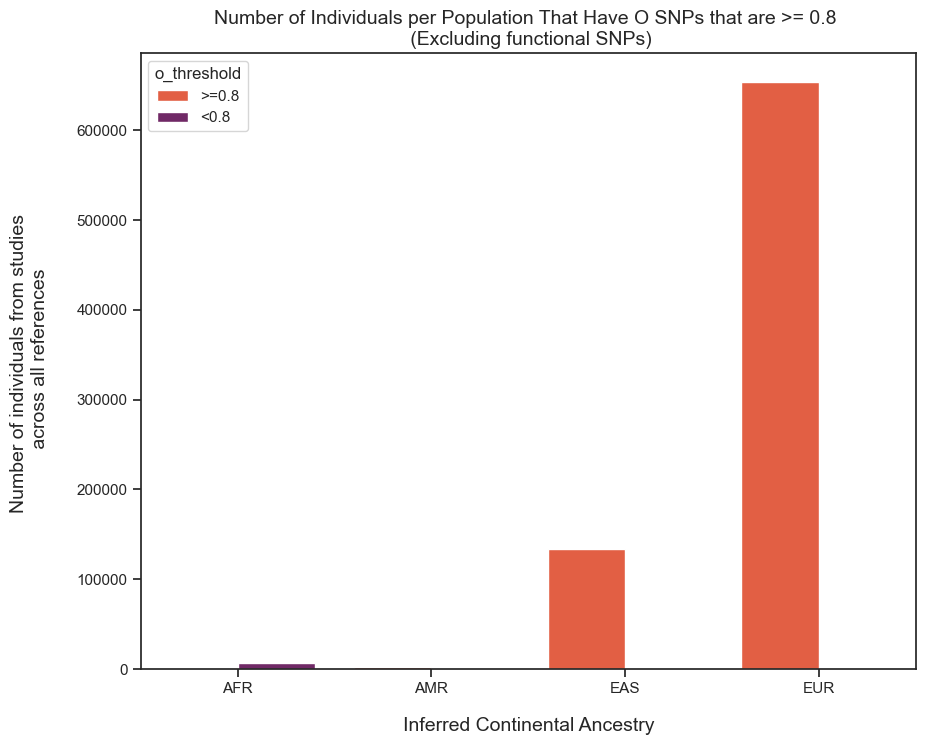

In [119]:
# set the figure size
plt.figure(figsize=(10, 8))

color_palette = ['#FC4E2A','#DC3977','#7C1D6F', '#045275', '#6CBA7D']

# make a barplot
sns.barplot(data=df, x="population", y="number_individuals", hue="o_threshold")

# customize
plt.title('Number of Individuals per Population That Have O SNPs that are >= 0.8 \n (Excluding functional SNPs)', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('Number of individuals from studies \n across all references', fontsize=14, labelpad=20)
plt.show()

## For AB SNPs

In [120]:
# duplicating this dataframe so that it can be used later on and not be changed by other analyses
r2_concat_ex_ab_og = r2_concat_ex_ab.copy() # DataFrame.copy() makes a copy of an object's indices and data
r2_concat_ex_ab_og.head()

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0
2,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR,AFR,3493,1.0000,NaN
3,730,rs8176719,NaN,101,101,0,0,0,0,0,AFR,AFR,101,1.0000,NaN
5,1950,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0
6,7,unclear,unclear,1082,419,0,0,663,0,0,"AFR, EUR",AFR,419,NaN,NaN


Dichotomize data as those with >0.8 and >0.8.

In [121]:
# set column to no
r2_concat_ex_ab['ab_threshold'] = np.nan
# if condition met set to yes
r2_concat_ex_ab.loc[r2_concat_ex_ab['ab_r2'] >= 0.8, "ab_threshold"] = ">=0.8"
r2_concat_ex_ab.loc[r2_concat_ex_ab['ab_r2'] < 0.8, "ab_threshold"] = "<0.8"
r2_concat_ex_ab.head()

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\1205209391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2_concat_ex_ab['ab_threshold'] = np.nan
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\1205209391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2_concat_ex_ab.loc[r2_concat_ex_ab['ab_r2'] >= 0.8, "ab_threshold"] = ">=0.8"


,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2,ab_threshold
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,>=0.8
2,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR,AFR,3493,1.0000,NaN,NaN
3,730,rs8176719,NaN,101,101,0,0,0,0,0,AFR,AFR,101,1.0000,NaN,NaN
5,1950,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,>=0.8
6,7,unclear,unclear,1082,419,0,0,663,0,0,"AFR, EUR",AFR,419,NaN,NaN,NaN


Trying to sum the pop_n per population if its greater than 0.8.

In [122]:
# make a new value for AFR

# for yes
afr_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold'] == ">=0.8") & (r2_concat_ex_ab['pop'] == "AFR")]
afr_yes_sum = afr_yes['pop_n'].sum()
# for no
afr_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold'] == "<0.8") & (r2_concat_ex_ab['pop'] == "AFR")] # subset based on conditions
afr_no = afr_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
afr_no_sum = afr_no['pop_n'].sum()

# make a new value for AMR

# for yes
amr_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold'] == ">=0.8") & (r2_concat_ex_ab['pop'] == "AMR")]
amr_yes_sum = amr_yes['pop_n'].sum()
# for no
amr_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold'] == "<0.8") & (r2_concat_ex_ab['pop'] == "AMR")] # subset based on conditions
amr_no = amr_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
amr_no_sum = amr_no['pop_n'].sum()

# make a new value for EAS

# for yes
eas_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold'] == ">=0.8") & (r2_concat_ex_ab['pop'] == "EAS")]
eas_yes_sum = eas_yes['pop_n'].sum()
# for no
eas_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold'] == "<0.8") & (r2_concat_ex_ab['pop'] == "EAS")] # subset based on conditions
eas_no = eas_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
eas_no_sum = eas_no['pop_n'].sum()

# make a new value for EUR

# for yes
eur_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold'] == ">=0.8") & (r2_concat_ex_ab['pop'] == "EUR")]
eur_yes_sum = eur_yes['pop_n'].sum()
# for no
eur_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold'] == "<0.8") & (r2_concat_ex_ab['pop'] == "EUR")] # subset based on conditions
eur_no = eur_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
eur_no_sum = eur_no['pop_n'].sum()

# make a new value for EUR

# for yes
eur_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold'] == ">=0.8") & (r2_concat_ex_ab['pop'] == "EUR")]
eur_yes_sum = eur_yes['pop_n'].sum()
# for no
eur_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold'] == "<0.8") & (r2_concat_ex_ab['pop'] == "EUR")] # subset based on conditions
eur_no = eur_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
eur_no_sum = eur_no['pop_n'].sum()

In [123]:
data = {'population': ['AFR', 'AMR', 'EAS', 'EUR', 'AFR', 'AMR', 'EAS', 'EUR'],
        'number_individuals': [afr_yes_sum, amr_yes_sum, eas_yes_sum, eur_yes_sum,
                              afr_no_sum, amr_no_sum, eas_no_sum, eur_no_sum],
        'ab_threshold': [">=0.8", ">=0.8", ">=0.8", ">=0.8", "<0.8", "<0.8", "<0.8", "<0.8"]}
df = pd.DataFrame(data)
df

,population,number_individuals,ab_threshold
0,AFR,6151,>=0.8
1,AMR,0,>=0.8
2,EAS,129,>=0.8
3,EUR,63594,>=0.8
4,AFR,0,<0.8
5,AMR,0,<0.8
6,EAS,92,<0.8
7,EUR,4327,<0.8


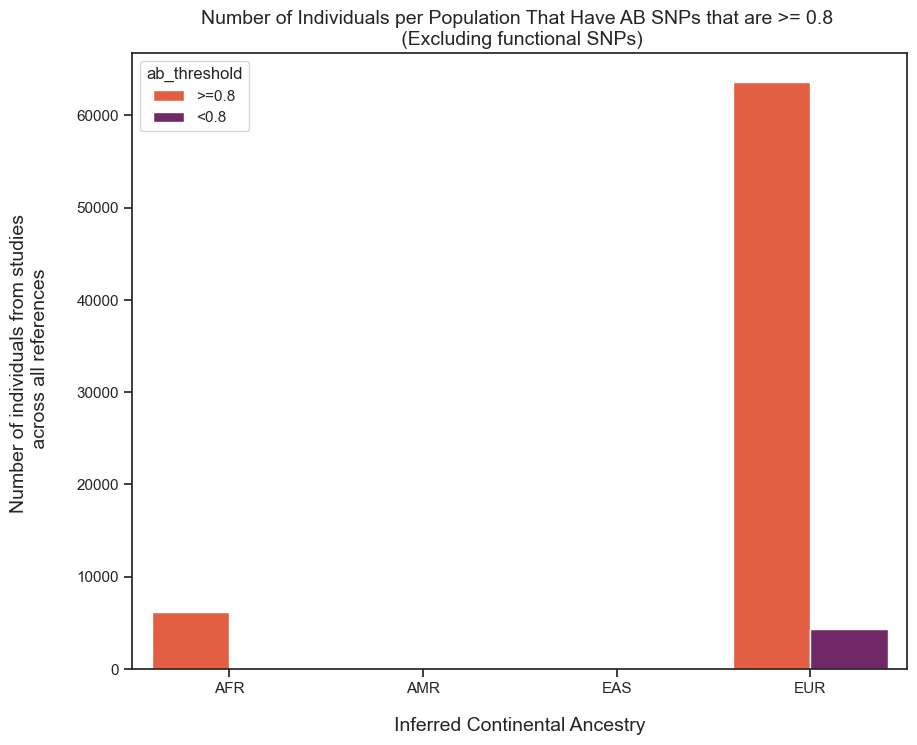

In [124]:
# set the figure size
plt.figure(figsize=(10, 8))

# make a barplot
sns.barplot(data=df, x="population", y="number_individuals", hue="ab_threshold")

# customize
plt.title('Number of Individuals per Population That Have AB SNPs that are >= 0.8 \n (Excluding functional SNPs)', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('Number of individuals from studies \n across all references', fontsize=14, labelpad=20)
plt.show()

# <span style="color:dodgerblue">Population n's with 0.9 r2 threshold - excluding functional SNPs</span>

## For O

In [125]:
r2_concat_ex_o.head(3)

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2,o_threshold
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,<0.8
5,1950,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,<0.8
6,7,unclear,unclear,1082,419,0,0,663,0,0,"AFR, EUR",AFR,419,NaN,NaN,NaN


Dichotomize data as those with >0.9 and >0.9.

In [126]:
# set column to no
r2_concat_ex_o['o_threshold2'] = np.nan
# if condition met set to yes
r2_concat_ex_o.loc[r2_concat_ex_o['o_r2'] >= 0.9, "o_threshold2"] = ">=0.9"
r2_concat_ex_o.loc[r2_concat_ex_o['o_r2'] < 0.9, "o_threshold2"] = "<0.9"
r2_concat_ex_o.head(3)

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\340818534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2_concat_ex_o['o_threshold2'] = np.nan
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\340818534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2_concat_ex_o.loc[r2_concat_ex_o['o_r2'] >= 0.9, "o_threshold2"] = ">=0.9"


,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2,o_threshold,o_threshold2
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,<0.8,<0.9
5,1950,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,<0.8,<0.9
6,7,unclear,unclear,1082,419,0,0,663,0,0,"AFR, EUR",AFR,419,NaN,NaN,NaN,NaN


Trying to sum the pop_n per population if its greater than 0.9.

In [127]:
# make a new value for AFR

# for yes
afr_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == ">=0.9") & (r2_concat_ex_o['pop'] == "AFR")]
afr_yes_sum = afr_yes['pop_n'].sum()
# for no
afr_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == "<0.9") & (r2_concat_ex_o['pop'] == "AFR")] # subset based on conditions
afr_no = afr_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
afr_no_sum = afr_no['pop_n'].sum()

# make a new value for AMR

# for yes
amr_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == ">=0.9") & (r2_concat_ex_o['pop'] == "AMR")]
amr_yes_sum = amr_yes['pop_n'].sum()
# for no
amr_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == "<0.9") & (r2_concat_ex_o['pop'] == "AMR")] # subset based on conditions
amr_no = amr_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
amr_no_sum = amr_no['pop_n'].sum()

# make a new value for EAS

# for yes
eas_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == ">=0.9") & (r2_concat_ex_o['pop'] == "EAS")]
eas_yes_sum = eas_yes['pop_n'].sum()
# for no
eas_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == "<0.9") & (r2_concat_ex_o['pop'] == "EAS")] # subset based on conditions
eas_no = eas_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
eas_no_sum = eas_no['pop_n'].sum()

# make a new value for EUR

# for yes
eur_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == ">=0.9") & (r2_concat_ex_o['pop'] == "EUR")]
eur_yes_sum = eur_yes['pop_n'].sum()
# for no
eur_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == "<0.9") & (r2_concat_ex_o['pop'] == "EUR")] # subset based on conditions
eur_no = eur_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
eur_no_sum = eur_no['pop_n'].sum()

# make a new value for EUR

# for yes
eur_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == ">=0.9") & (r2_concat_ex_o['pop'] == "EUR")]
eur_yes_sum = eur_yes['pop_n'].sum()
# for no
eur_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == "<0.9") & (r2_concat_ex_o['pop'] == "EUR")] # subset based on conditions
eur_no = eur_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
eur_no_sum = eur_no['pop_n'].sum()

In [128]:
data = {'population': ['AFR', 'AMR', 'EAS', 'EUR', 'AFR', 'AMR', 'EAS', 'EUR'],
        'number_individuals': [afr_yes_sum, amr_yes_sum, eas_yes_sum, eur_yes_sum,
                              afr_no_sum, amr_no_sum, eas_no_sum, eur_no_sum],
        'o_threshold2': [">=0.9", ">=0.9", ">=0.9", ">=0.9", "<0.9", "<0.9", "<0.9", "<0.9"]}
df = pd.DataFrame(data)
df

,population,number_individuals,o_threshold2
0,AFR,0,>=0.9
1,AMR,0,>=0.9
2,EAS,133293,>=0.9
3,EUR,373040,>=0.9
4,AFR,6234,<0.9
5,AMR,2077,<0.9
6,EAS,0,<0.9
7,EUR,280259,<0.9


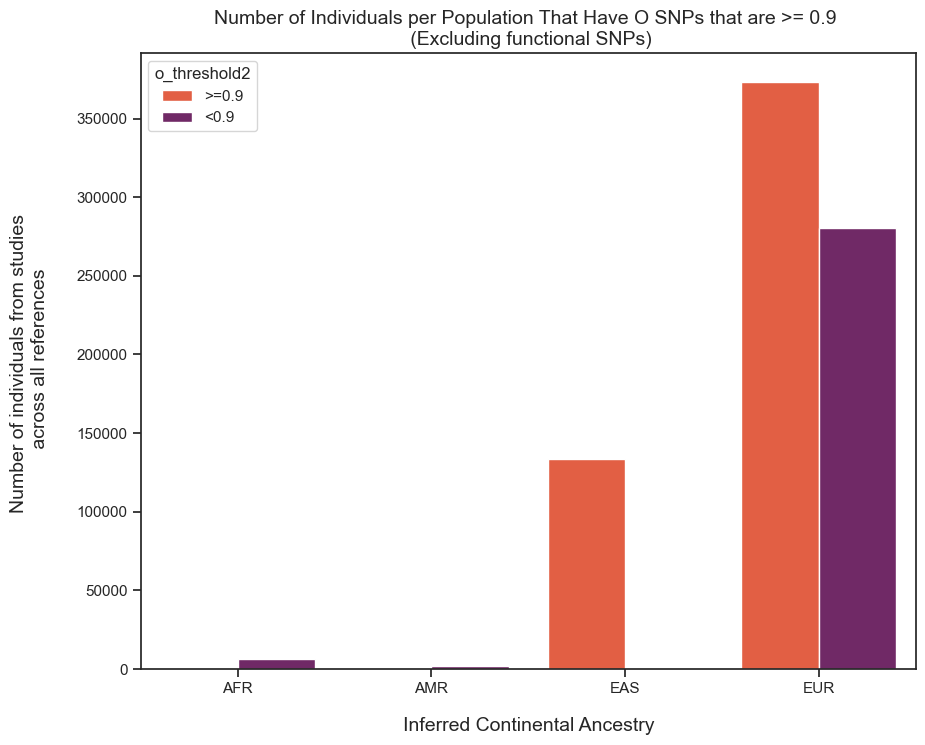

In [129]:
# set the figure size
plt.figure(figsize=(10, 8))

# barplot
sns.barplot(data=df, x="population", y="number_individuals", hue="o_threshold2")

#customize
plt.title('Number of Individuals per Population That Have O SNPs that are >= 0.9 \n (Excluding functional SNPs)', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('Number of individuals from studies \n across all references', fontsize=14, labelpad=20)
plt.show()

### Percent Stacked Bar Chart

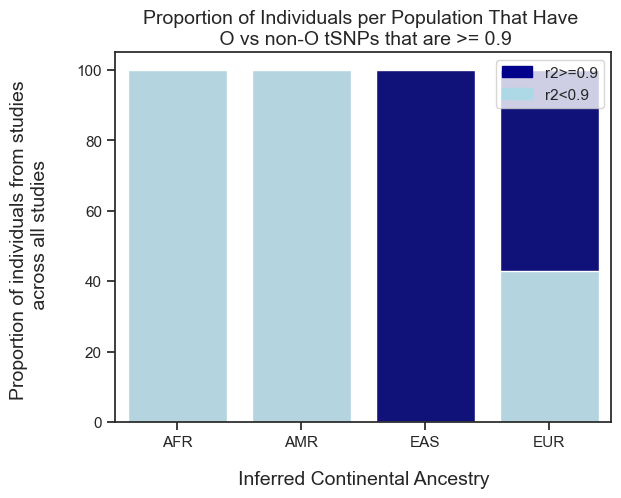

In [130]:
# set the figure size
#plt.figure(figsize=(10, 8))

# assign
bar_fig1 = plt.gcf()

# from raw value to percentage
total = df.groupby('population')['number_individuals'].sum().reset_index()
no = df[df['o_threshold2']=='<0.9'].groupby('population')['number_individuals'].sum().reset_index()
no['number_individuals'] = [i / j * 100 for i,j in zip(no['number_individuals'], total['number_individuals'])]
total['number_individuals'] = [i / j * 100 for i,j in zip(total['number_individuals'], total['number_individuals'])]


# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="population",  y="number_individuals", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="population", y="number_individuals", data=no, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='r2>=0.9')
bottom_bar = mpatches.Patch(color='lightblue', label='r2<0.9')
plt.legend(handles=[top_bar, bottom_bar])


plt.title('Proportion of Individuals per Population That Have \n O vs non-O tSNPs that are >= 0.9', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('Proportion of individuals from studies \n across all studies', fontsize=14, labelpad=20)

# show the graph
plt.show()

# save figure
bar_fig1.savefig(f"{directory}results/python_figures/o_proportion-plot-tsnp-below-0.9.svg", 
           format='svg',
           bbox_inches="tight")

#### Fisher's Exact Test

In [131]:
# call on dataframe
df

,population,number_individuals,o_threshold2
0,AFR,0,>=0.9
1,AMR,0,>=0.9
2,EAS,133293,>=0.9
3,EUR,373040,>=0.9
4,AFR,6234,<0.9
5,AMR,2077,<0.9
6,EAS,0,<0.9
7,EUR,280259,<0.9


In [132]:
# make a contingency table from the original dataframe
contingency_table = df.pivot_table(index=['population'], columns=['o_threshold2'], values = 'number_individuals') # pivoting table
contingency_table

#  make a contingency table and then convert counts into proportions
# contingency_table = df.pivot_table(index=['r2>=0.9'], columns=['population'], values = 'number_individuals').apply(lambda r:r/r.sum(),axis=0) 
# contingency_table 

o_threshold2,<0.9,>=0.9
population,,
AFR,6234,0
AMR,2077,0
EAS,0,133293
EUR,280259,373040


## For AB

In [133]:
r2_concat_ex_ab.head(3)

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2,ab_threshold
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,>=0.8
2,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR,AFR,3493,1.0000,NaN,NaN
3,730,rs8176719,NaN,101,101,0,0,0,0,0,AFR,AFR,101,1.0000,NaN,NaN


Dichotomize data as those with >0.9 and >0.9.

In [134]:
# set column to no
r2_concat_ex_ab['ab_threshold2'] = np.nan
# if condition met set to yes
r2_concat_ex_ab.loc[r2_concat_ex_ab['ab_r2'] >= 0.9, "ab_threshold2"] = ">=0.9"
r2_concat_ex_ab.loc[r2_concat_ex_ab['ab_r2'] < 0.9, "ab_threshold2"] = "<0.9"
r2_concat_ex_ab.head(3)

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\2452360084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2_concat_ex_ab['ab_threshold2'] = np.nan
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\2452360084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2_concat_ex_ab.loc[r2_concat_ex_ab['ab_r2'] >= 0.9, "ab_threshold2"] = ">=0.9"


,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2,ab_threshold,ab_threshold2
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,>=0.8,>=0.9
2,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR,AFR,3493,1.0000,NaN,NaN,NaN
3,730,rs8176719,NaN,101,101,0,0,0,0,0,AFR,AFR,101,1.0000,NaN,NaN,NaN


Trying to sum the pop_n per population if its greater than 0.9.

In [135]:
# make a new value for AFR

# for yes
afr_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == ">=0.9") & (r2_concat_ex_ab['pop'] == "AFR")]
afr_yes_sum = afr_yes['pop_n'].sum()
# for no
afr_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == "<0.9") & (r2_concat_ex_ab['pop'] == "AFR")] # subset based on conditions
afr_no = afr_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
afr_no_sum = afr_no['pop_n'].sum()

# make a new value for AMR

# for yes
amr_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == ">=0.9") & (r2_concat_ex_ab['pop'] == "AMR")]
amr_yes_sum = amr_yes['pop_n'].sum()
# for no
amr_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == "<0.9") & (r2_concat_ex_ab['pop'] == "AMR")] # subset based on conditions
amr_no = amr_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
amr_no_sum = amr_no['pop_n'].sum()

# make a new value for EAS

# for yes
eas_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == ">=0.9") & (r2_concat_ex_ab['pop'] == "EAS")]
eas_yes_sum = eas_yes['pop_n'].sum()
# for no
eas_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == "<0.9") & (r2_concat_ex_ab['pop'] == "EAS")] # subset based on conditions
eas_no = eas_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
eas_no_sum = eas_no['pop_n'].sum()

# make a new value for EUR

# for yes
eur_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == ">=0.9") & (r2_concat_ex_ab['pop'] == "EUR")]
eur_yes_sum = eur_yes['pop_n'].sum()
# for no
eur_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == "<0.9") & (r2_concat_ex_ab['pop'] == "EUR")] # subset based on conditions
eur_no = eur_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
eur_no_sum = eur_no['pop_n'].sum()

# make a new value for EUR

# for yes
eur_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == ">=0.9") & (r2_concat_ex_ab['pop'] == "EUR")]
eur_yes_sum = eur_yes['pop_n'].sum()
# for no
eur_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == "<0.9") & (r2_concat_ex_ab['pop'] == "EUR")] # subset based on conditions
eur_no = eur_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
eur_no_sum = eur_no['pop_n'].sum()

In [136]:
data = {'population': ['AFR', 'AMR', 'EAS', 'EUR', 'AFR', 'AMR', 'EAS', 'EUR'],
        'number_individuals': [afr_yes_sum, amr_yes_sum, eas_yes_sum, eur_yes_sum,
                              afr_no_sum, amr_no_sum, eas_no_sum, eur_no_sum],
        'ab_threshold2': [">=0.9", ">=0.9", ">=0.9", ">=0.9", "<0.9", "<0.9", "<0.9", "<0.9"]}
df = pd.DataFrame(data)
df

,population,number_individuals,ab_threshold2
0,AFR,6151,>=0.9
1,AMR,0,>=0.9
2,EAS,129,>=0.9
3,EUR,63594,>=0.9
4,AFR,0,<0.9
5,AMR,0,<0.9
6,EAS,92,<0.9
7,EUR,4327,<0.9


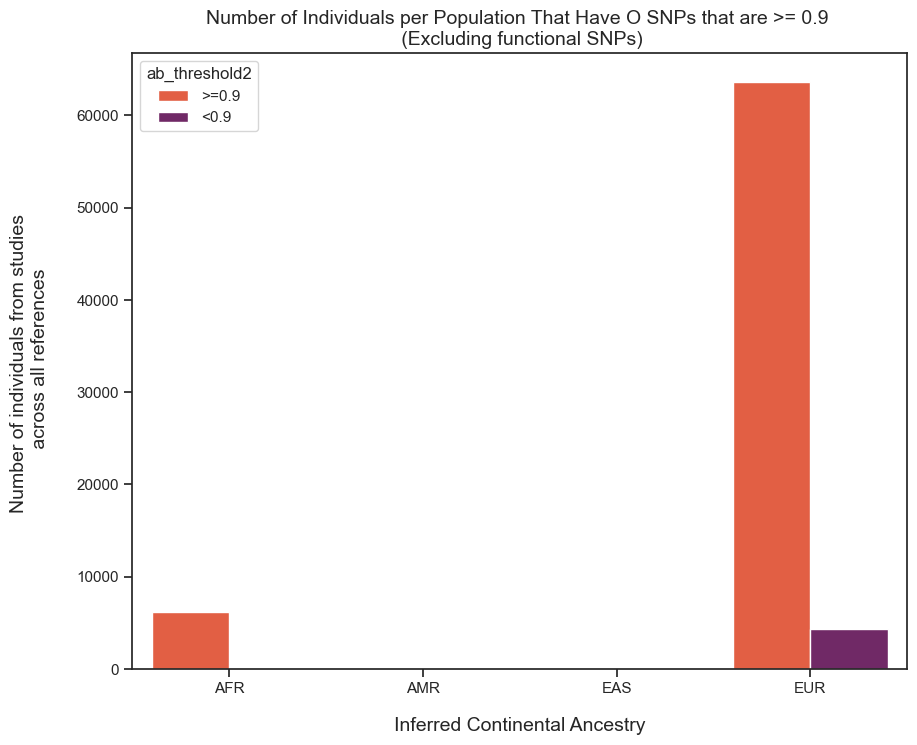

In [137]:
# set the figure size
plt.figure(figsize=(10, 8))

# barplot
sns.barplot(data=df, x="population", y="number_individuals", hue="ab_threshold2")

#customize
plt.title('Number of Individuals per Population That Have O SNPs that are >= 0.9 \n (Excluding functional SNPs)', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('Number of individuals from studies \n across all references', fontsize=14, labelpad=20)
plt.show()

### Percent Stacked Bar Chart

In [138]:
df

,population,number_individuals,ab_threshold2
0,AFR,6151,>=0.9
1,AMR,0,>=0.9
2,EAS,129,>=0.9
3,EUR,63594,>=0.9
4,AFR,0,<0.9
5,AMR,0,<0.9
6,EAS,92,<0.9
7,EUR,4327,<0.9


AMR doesn't use functional SNPs so need to remove. 

In [139]:
# remove AMR
df2 = df.loc[(df['population'] != "AMR")]
df2

,population,number_individuals,ab_threshold2
0,AFR,6151,>=0.9
2,EAS,129,>=0.9
3,EUR,63594,>=0.9
4,AFR,0,<0.9
6,EAS,92,<0.9
7,EUR,4327,<0.9


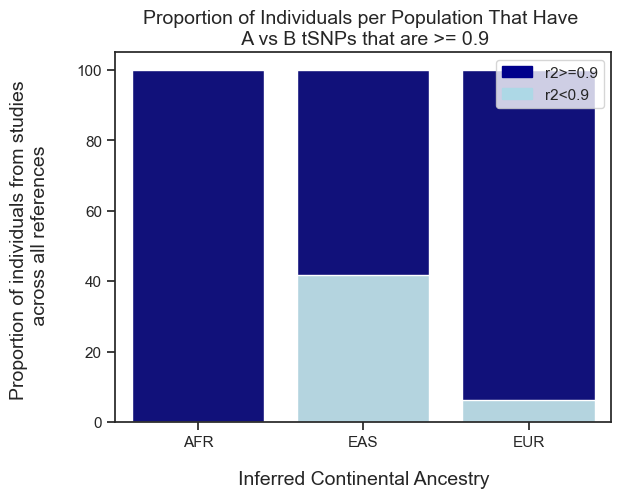

In [141]:
# set the figure size
#plt.figure(figsize=(10, 8))

# assign
fig_boxplot_ab = plt.gcf()

# from raw value to percentage
total = df2.groupby('population')['number_individuals'].sum().reset_index()
no = df2[df2['ab_threshold2']=='<0.9'].groupby('population')['number_individuals'].sum().reset_index()
no['number_individuals'] = [i / j * 100 for i,j in zip(no['number_individuals'], total['number_individuals'])]
total['number_individuals'] = [i / j * 100 for i,j in zip(total['number_individuals'], total['number_individuals'])]


# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="population",  y="number_individuals", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="population", y="number_individuals", data=no, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='r2>=0.9')
bottom_bar = mpatches.Patch(color='lightblue', label='r2<0.9')
plt.legend(handles=[top_bar, bottom_bar])


plt.title('Proportion of Individuals per Population That Have \n A vs B tSNPs that are >= 0.9', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('Proportion of individuals from studies \n across all references', fontsize=14, labelpad=20)

# show the graph
plt.show()

# save figure
fig_boxplot_ab.savefig(f"{directory}results/python_figures/ab_proportion-plot-tsnp-below-0.9.svg", 
           format='svg',
           bbox_inches="tight")

####  Fisher's Exact Test

In [142]:
# call on dataframe
df2

,population,number_individuals,ab_threshold2
0,AFR,6151,>=0.9
2,EAS,129,>=0.9
3,EUR,63594,>=0.9
4,AFR,0,<0.9
6,EAS,92,<0.9
7,EUR,4327,<0.9


In [143]:
# make a contingency table from the original dataframe
contingency_table = df2.pivot_table(index=['population'], columns=['ab_threshold2'], values = 'number_individuals') # pivoting table
contingency_table

#  make a contingency table and then convert counts into proportions
# contingency_table = df.pivot_table(index=['r2>=0.9'], columns=['population'], values = 'number_individuals').apply(lambda r:r/r.sum(),axis=0) 
# contingency_table 

ab_threshold2,<0.9,>=0.9
population,,
AFR,0,6151
EAS,92,129
EUR,4327,63594


# <span style="color:dodgerblue">Study n's with 0.9 r2 threshold - excluding functional SNPs</span>

## For O

In [144]:
r2_concat_ex_o.head(3)

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2,o_threshold,o_threshold2
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,<0.8,<0.9
5,1950,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,<0.8,<0.9
6,7,unclear,unclear,1082,419,0,0,663,0,0,"AFR, EUR",AFR,419,NaN,NaN,NaN,NaN


Dichotomize data as those with >0.9 and >0.9.

In [145]:
# set column to no
r2_concat_ex_o['o_threshold2'] = np.nan
# if condition met set to yes
r2_concat_ex_o.loc[r2_concat_ex_o['o_r2'] >= 0.9, "o_threshold2"] = ">=0.9"
r2_concat_ex_o.loc[r2_concat_ex_o['o_r2'] < 0.9, "o_threshold2"] = "<0.9"
r2_concat_ex_o

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\3115185750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2_concat_ex_o['o_threshold2'] = np.nan
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\3115185750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2_concat_ex_o.loc[r2_concat_ex_o['o_r2'] >= 0.9, "o_threshold2"] = ">=0.9"


,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2,o_threshold,o_threshold2
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,<0.8,<0.9
5,1950,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,<0.8,<0.9
6,7,unclear,unclear,1082,419,0,0,663,0,0,"AFR, EUR",AFR,419,NaN,NaN,NaN,NaN
8,25,rs505922,rs8176746,1127,83,0,0,983,0,61,"AFR, EUR, other",AFR,83,0.4375,1.0,<0.8,<0.9
16,1561,unclear,unclear,1147,1147,0,0,0,0,0,AFR,AFR,1147,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,1635,rs505922,NaN,629,0,0,0,629,0,0,EUR,EUR,629,0.8687,NaN,>=0.8,<0.9
119,1661,rs657152,NaN,361975,0,0,0,361975,0,0,EUR,EUR,361975,0.9713,NaN,>=0.8,>=0.9
121,1705,unclear,rs8176746,5284,0,0,0,5284,0,0,EUR,EUR,5284,NaN,1.0,NaN,NaN
123,1763,rs529565,rs8176749,23603,5047,0,0,18556,0,0,"AFR, EUR",EUR,18556,0.8608,1.0,>=0.8,<0.9


Trying to sum the rows per population if its greater than 0.9.

In [146]:
# make a new value for AFR

# for yes
afr_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == ">=0.9") & (r2_concat_ex_o['pop'] == "AFR")]
afr_yes_len = len(afr_yes)
# for no
afr_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == "<0.9") & (r2_concat_ex_o['pop'] == "AFR")] # subset based on conditions
afr_no = afr_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
afr_no_len = len(afr_no)

# make a new value for AMR

# for yes
amr_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == ">=0.9") & (r2_concat_ex_o['pop'] == "AMR")]
amr_yes_len = len(amr_yes)
# for no
amr_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == "<0.9") & (r2_concat_ex_o['pop'] == "AMR")] # subset based on conditions
amr_no = amr_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
amr_no_len = len(amr_no)

# make a new value for EAS

# for yes
eas_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == ">=0.9") & (r2_concat_ex_o['pop'] == "EAS")]
eas_yes_len = len(eas_yes)
# for no
eas_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == "<0.9") & (r2_concat_ex_o['pop'] == "EAS")] # subset based on conditions
eas_no = eas_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
eas_no_len = len(eas_no)

# make a new value for EUR

# for yes
eur_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == ">=0.9") & (r2_concat_ex_o['pop'] == "EUR")]
eur_yes_len = len(eur_yes)
# for no
eur_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == "<0.9") & (r2_concat_ex_o['pop'] == "EUR")] # subset based on conditions
eur_no = eur_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
eur_no_len = len(eur_no)

# make a new value for EUR

# for yes
eur_yes = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == ">=0.9") & (r2_concat_ex_o['pop'] == "EUR")]
eur_yes_len = len(eur_yes)
# for no
eur_no = r2_concat_ex_o.loc[(r2_concat_ex_o['o_threshold2'] == "<0.9") & (r2_concat_ex_o['pop'] == "EUR")] # subset based on conditions
eur_no = eur_no.dropna(subset=['o_r2']) # drop nan that appear in o_r2 column
eur_no_len = len(eur_no)

In [147]:
data = {'population': ['AFR', 'AMR', 'EAS', 'EUR', 'AFR', 'AMR', 'EAS', 'EUR'],
        'number_studies': [afr_yes_len, amr_yes_len, eas_yes_len, eur_yes_len,
                              afr_no_len, amr_no_len, eas_no_len, eur_no_len],
        'o_threshold2': [">=0.9", ">=0.9", ">=0.9", ">=0.9", "<0.9", "<0.9", "<0.9", "<0.9"]}
df = pd.DataFrame(data)
df

,population,number_studies,o_threshold2
0,AFR,0,>=0.9
1,AMR,0,>=0.9
2,EAS,10,>=0.9
3,EUR,4,>=0.9
4,AFR,4,<0.9
5,AMR,1,<0.9
6,EAS,0,<0.9
7,EUR,33,<0.9


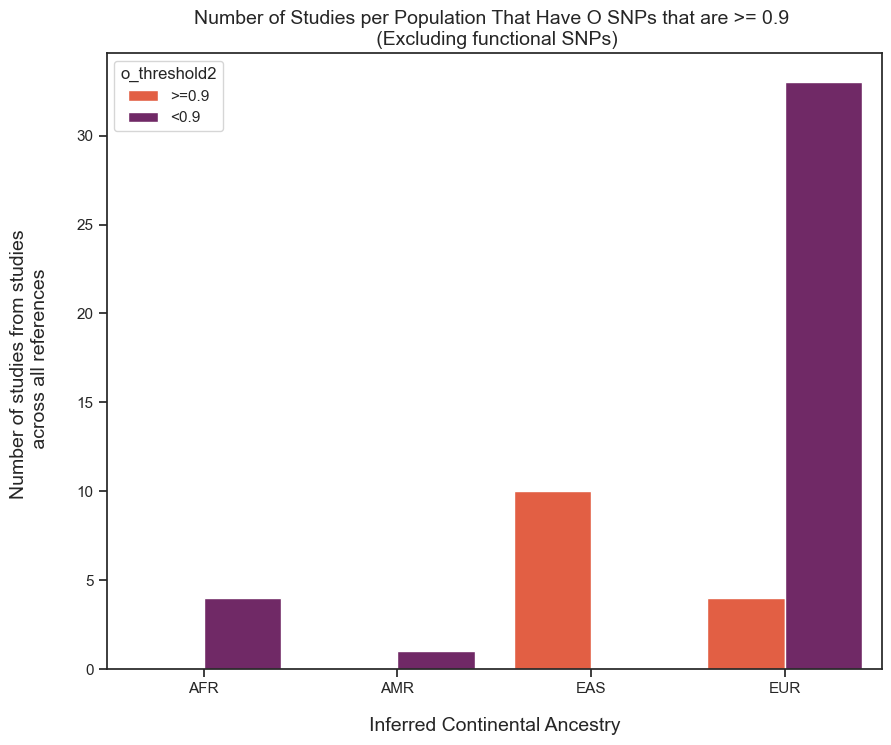

In [148]:
# set the figure size
plt.figure(figsize=(10, 8))

# barplot
sns.barplot(data=df, x="population", y="number_studies", hue="o_threshold2")

#customize
plt.title('Number of Studies per Population That Have O SNPs that are >= 0.9 \n (Excluding functional SNPs)', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('Number of studies from studies \n across all references', fontsize=14, labelpad=20)
plt.show()

### Percent Stacked Bar Chart

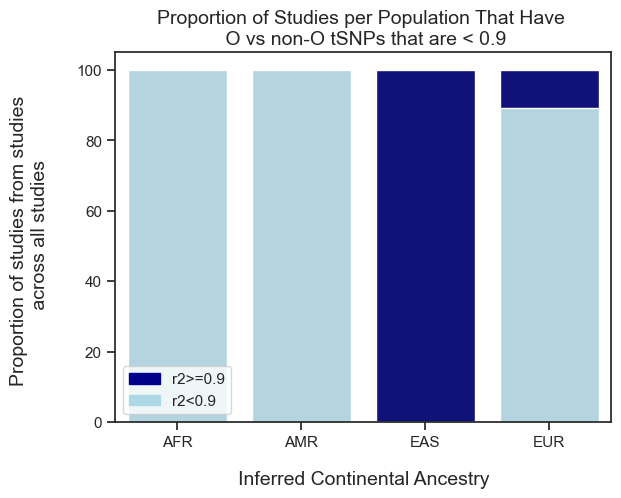

In [150]:
# set the figure size
#plt.figure(figsize=(10, 8))

# assign
bar_fig1 = plt.gcf()

# from raw value to percentage
total = df.groupby('population')['number_studies'].sum().reset_index()
no = df[df['o_threshold2']=='<0.9'].groupby('population')['number_studies'].sum().reset_index()
no['number_studies'] = [i / j * 100 for i,j in zip(no['number_studies'], total['number_studies'])]
total['number_studies'] = [i / j * 100 for i,j in zip(total['number_studies'], total['number_studies'])]


# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="population",  y="number_studies", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="population", y="number_studies", data=no, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='r2>=0.9')
bottom_bar = mpatches.Patch(color='lightblue', label='r2<0.9')
plt.legend(handles=[top_bar, bottom_bar], loc='lower left')


plt.title('Proportion of Studies per Population That Have \n O vs non-O tSNPs that are < 0.9', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('Proportion of studies from studies \n across all studies', fontsize=14, labelpad=20)

# show the graph
plt.show()

# save figure
bar_fig1.savefig(f"{directory}results/python_figures/studies_o_proportion-plot-tsnp-below-0.9.svg", 
           format='svg',
           bbox_inches="tight")

#### Fisher's Exact Test

In [151]:
# call on dataframe
df

,population,number_studies,o_threshold2
0,AFR,0,>=0.9
1,AMR,0,>=0.9
2,EAS,10,>=0.9
3,EUR,4,>=0.9
4,AFR,4,<0.9
5,AMR,1,<0.9
6,EAS,0,<0.9
7,EUR,33,<0.9


In [152]:
# make a contingency table from the original dataframe
contingency_table = df.pivot_table(index=['population'], columns=['o_threshold2'], values = 'number_studies') # pivoting table
contingency_table

o_threshold2,<0.9,>=0.9
population,,
AFR,4,0
AMR,1,0
EAS,0,10
EUR,33,4


## For AB

In [153]:
r2_concat_ex_ab.head(3)

,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2,ab_threshold,ab_threshold2
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,>=0.8,>=0.9
2,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR,AFR,3493,1.0000,NaN,NaN,NaN
3,730,rs8176719,NaN,101,101,0,0,0,0,0,AFR,AFR,101,1.0000,NaN,NaN,NaN


Dichotomize data as those with >0.9 and >0.9.

In [154]:
# set column to no
r2_concat_ex_ab['ab_threshold2'] = np.nan
# if condition met set to yes
r2_concat_ex_ab.loc[r2_concat_ex_ab['ab_r2'] >= 0.9, "ab_threshold2"] = ">=0.9"
r2_concat_ex_ab.loc[r2_concat_ex_ab['ab_r2'] < 0.9, "ab_threshold2"] = "<0.9"
r2_concat_ex_ab.head(3)

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\2452360084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2_concat_ex_ab['ab_threshold2'] = np.nan
C:\Users\klmartinez\AppData\Local\Temp\ipykernel_3964\2452360084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2_concat_ex_ab.loc[r2_concat_ex_ab['ab_r2'] >= 0.9, "ab_threshold2"] = ">=0.9"


,refid,o_snp,a_b_snp,total_cohort_n,afr_n,amr_n,eas_n,eur_n,sas_n,other_n,1000g_pop,pop,pop_n,o_r2,ab_r2,ab_threshold,ab_threshold2
1,49,rs687289,rs8176749,1104,552,0,0,552,0,0,"AFR, EUR",AFR,552,0.4476,1.0,>=0.8,>=0.9
2,325,rs8176719,NaN,3493,3493,0,0,0,0,0,AFR,AFR,3493,1.0000,NaN,NaN,NaN
3,730,rs8176719,NaN,101,101,0,0,0,0,0,AFR,AFR,101,1.0000,NaN,NaN,NaN


Trying to sum the rows per population if its greater than 0.9.

In [155]:
# make a new value for AFR

# for yes
afr_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == ">=0.9") & (r2_concat_ex_ab['pop'] == "AFR")]
afr_yes_len = len(afr_yes)
# for no
afr_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == "<0.9") & (r2_concat_ex_ab['pop'] == "AFR")] # subset based on conditions
afr_no = afr_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
afr_no_len = len(afr_no)

# make a new value for AMR

# for yes
amr_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == ">=0.9") & (r2_concat_ex_ab['pop'] == "AMR")]
amr_yes_len = len(amr_yes)
# for no
amr_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == "<0.9") & (r2_concat_ex_ab['pop'] == "AMR")] # subset based on conditions
amr_no = amr_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
amr_no_len = len(amr_no)

# make a new value for EAS

# for yes
eas_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == ">=0.9") & (r2_concat_ex_ab['pop'] == "EAS")]
eas_yes_len = len(eas_yes)
# for no
eas_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == "<0.9") & (r2_concat_ex_ab['pop'] == "EAS")] # subset based on conditions
eas_no = eas_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
eas_no_len = len(eas_no)

# make a new value for EUR

# for yes
eur_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == ">=0.9") & (r2_concat_ex_ab['pop'] == "EUR")]
eur_yes_len = len(eur_yes)
# for no
eur_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == "<0.9") & (r2_concat_ex_ab['pop'] == "EUR")] # subset based on conditions
eur_no = eur_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
eur_no_len = len(eur_no)

# make a new value for EUR

# for yes
eur_yes = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == ">=0.9") & (r2_concat_ex_ab['pop'] == "EUR")]
eur_yes_len = len(eur_yes)
# for no
eur_no = r2_concat_ex_ab.loc[(r2_concat_ex_ab['ab_threshold2'] == "<0.9") & (r2_concat_ex_ab['pop'] == "EUR")] # subset based on conditions
eur_no = eur_no.dropna(subset=['ab_r2']) # drop nan that appear in ab_r2 column
eur_no_len = len(eur_no)

In [156]:
data = {'population': ['AFR', 'AMR', 'EAS', 'EUR', 'AFR', 'AMR', 'EAS', 'EUR'],
        'number_studies': [afr_yes_len, amr_yes_len, eas_yes_len, eur_yes_len,
                              afr_no_len, amr_no_len, eas_no_len, eur_no_len],
        'ab_threshold2': [">=0.9", ">=0.9", ">=0.9", ">=0.9", "<0.9", "<0.9", "<0.9", "<0.9"]}
df = pd.DataFrame(data)
df

,population,number_studies,ab_threshold2
0,AFR,3,>=0.9
1,AMR,0,>=0.9
2,EAS,1,>=0.9
3,EUR,11,>=0.9
4,AFR,0,<0.9
5,AMR,0,<0.9
6,EAS,1,<0.9
7,EUR,1,<0.9


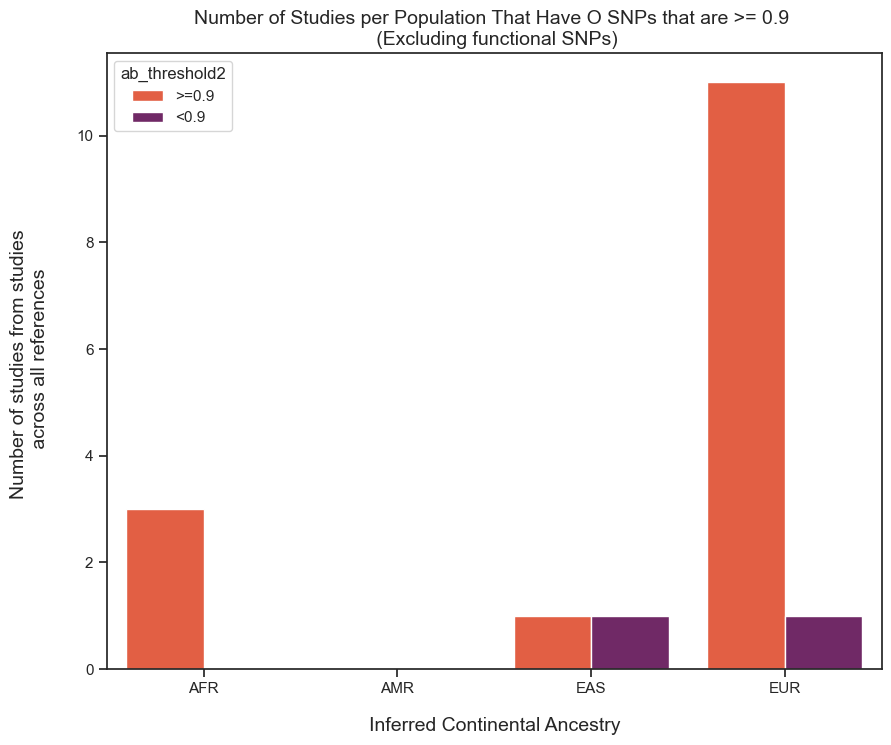

In [157]:
# set the figure size
plt.figure(figsize=(10, 8))

# barplot
sns.barplot(data=df, x="population", y="number_studies", hue="ab_threshold2")

#customize
plt.title('Number of Studies per Population That Have O SNPs that are >= 0.9 \n (Excluding functional SNPs)', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('Number of studies from studies \n across all references', fontsize=14, labelpad=20)
plt.show()

### Percent Stacked Bar Chart

In [158]:
df

,population,number_studies,ab_threshold2
0,AFR,3,>=0.9
1,AMR,0,>=0.9
2,EAS,1,>=0.9
3,EUR,11,>=0.9
4,AFR,0,<0.9
5,AMR,0,<0.9
6,EAS,1,<0.9
7,EUR,1,<0.9


AMR doesn't use functional SNPs so need to remove. 

In [159]:
# remove AMR
df2 = df.loc[(df['population'] != "AMR")]
df2

,population,number_studies,ab_threshold2
0,AFR,3,>=0.9
2,EAS,1,>=0.9
3,EUR,11,>=0.9
4,AFR,0,<0.9
6,EAS,1,<0.9
7,EUR,1,<0.9


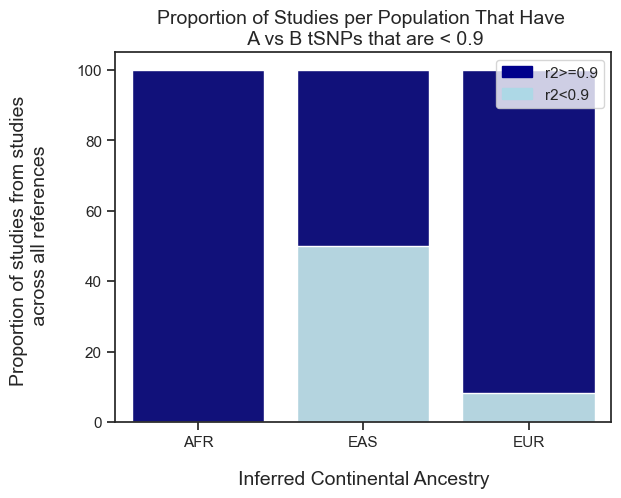

In [161]:
# set the figure size
#plt.figure(figsize=(10, 8))

# assign
fig_boxplot_ab = plt.gcf()

# from raw value to percentage
total = df2.groupby('population')['number_studies'].sum().reset_index()
no = df2[df2['ab_threshold2']=='<0.9'].groupby('population')['number_studies'].sum().reset_index()
no['number_studies'] = [i / j * 100 for i,j in zip(no['number_studies'], total['number_studies'])]
total['number_studies'] = [i / j * 100 for i,j in zip(total['number_studies'], total['number_studies'])]


# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="population",  y="number_studies", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="population", y="number_studies", data=no, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='r2>=0.9')
bottom_bar = mpatches.Patch(color='lightblue', label='r2<0.9')
plt.legend(handles=[top_bar, bottom_bar])


plt.title('Proportion of Studies per Population That Have \n A vs B tSNPs that are < 0.9', fontsize=14)
plt.xlabel('Inferred Continental Ancestry', fontsize=14, labelpad=15)
plt.ylabel('Proportion of studies from studies \n across all references', fontsize=14, labelpad=20)

# show the graph
plt.show()

# save figure
fig_boxplot_ab.savefig(f"{directory}results/python_figures/studies_ab_proportion-plot-tsnp-below-0.9.svg", 
           format='svg',
           bbox_inches="tight")

####  Fisher's Exact Test

In [162]:
# call on dataframe
df2

,population,number_studies,ab_threshold2
0,AFR,3,>=0.9
2,EAS,1,>=0.9
3,EUR,11,>=0.9
4,AFR,0,<0.9
6,EAS,1,<0.9
7,EUR,1,<0.9


In [163]:
# make a contingency table from the original dataframe
contingency_table = df2.pivot_table(index=['population'], columns=['ab_threshold2'], values = 'number_studies') # pivoting table
contingency_table

ab_threshold2,<0.9,>=0.9
population,,
AFR,0,3
EAS,1,1
EUR,1,11
